# Introduction

For this assignment the PAMAP2 data set is used. PAMAP2 data is the data of physical Activity Monitoring. The data set contains  recorded information from 18 activities performed by 9 subjects, wearing 3 IMUs and a HR-monitor. The activities performed by the subjects comprises of a wide range of everyday, household and sport activities. The goal is to derive actionable insights to which will help in developing hardware or software which can determine the amount and type of physical activity carried out by an individual. 

Details of the data used:

IMU - An IMU is a type of sensor that measures angular rate, force and sometimes magnetic field. IMUs are composed of a 3-axis accelerometer and a 3-axis gyroscope, which would be considered a 6-axis IMU. IMU also includes an additional 3-axis magnetometer, which would be considered a 9-axis IMU. Technically, the term “IMU” refers to just the sensor, but IMUs are often paired with sensor fusion software which combines data from multiple sensors to provide measures of orientation and heading. In this experimet 3 Colibri wireless IMUs are used, which have sampling frequency of 100Hz each. 1 IMUis placed over the wrist on the dominant arm, 1 IMU is placed on the chest and 1 IMU is placed on the dominant side's ankle.


Heart Rate Monitor - Heart rate monitors work by measuring electrical signals from the heart in real time.In this experiment 1 Heart Rate Monitor is used by each subecjt which has a frequency of 9Hz.

Suject Information - There are 9 subjects who have participated in the experiment. The subjects are mainly employees or students at DFKI. There is 1 female, 8 males the subject aged between 27.22 ± 3.31 years and BMI 25.11 ± 2.62 kgm-2. Each of the subjects had to follow a protocol, containing 12 different activities.

Altogether, over 10 hours of data were collected, from which nearly 8 hours were labeled as 1 of the 18
activities performed during data collection

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
%matplotlib inline
import seaborn as sns

There are 9 dat files for each subject which contains the real time data of each subject, the activities they performed, the IMU readings and HR-monitor readings. I have converted the dat files into csv files before loading the files. In the code below I have loaded all the files in a single Data Frame. This will ensure all the information is stored in 1 data set and will be easily available when required.
The subjects have been given the subject ID's. A list of the file names has to be created in order to load all the files and create the data frame. Moreover, a dictionary that will hold the names as well as numbers of each different activity has to be created in order to be able to understand which activity is being analysed at each phase.
Lists for each different category of IMU's have to be put together as well in order to have the column names for the data frame. IMU's that will be used are for chest, ankle and hand.
Then all the different lists have to be put together to create the collection of the columns. There are total 55 columns in the data set



In [ ]:
list_of_files = [r'C:\Users\SHALAKA\Desktop\DSRM Final Assignment\subject101.csv',
                 r'C:\Users\SHALAKA\Desktop\DSRM Final Assignment\subject102.csv',
                 r'C:\Users\SHALAKA\Desktop\DSRM Final Assignment\subject103.csv',
                 r'C:\Users\SHALAKA\Desktop\DSRM Final Assignment\subject104.csv',
                 r'C:\Users\SHALAKA\Desktop\DSRM Final Assignment\subject105.csv',
                 r'C:\Users\SHALAKA\Desktop\DSRM Final Assignment\subject106.csv',
                 r'C:\Users\SHALAKA\Desktop\DSRM Final Assignment\subject107.csv',
                 r'C:\Users\SHALAKA\Desktop\DSRM Final Assignment\subject108.csv',
                 r'C:\Users\SHALAKA\Desktop\DSRM Final Assignment\subject109.csv' ]

subjectID = [1,2,3,4,5,6,7,8,9]
activityIDdict = {0: 'transient',
              1: 'lying',
              2: 'sitting',
              3: 'standing',
              4: 'walking',
              5: 'running',
              6: 'cycling',
              7: 'Nordic_walking',
              9: 'watching_TV',
              10: 'computer_work',
              11: 'car driving',
              12: 'ascending_stairs',
              13: 'descending_stairs',
              16: 'vacuum_cleaning',
              17: 'ironing',
              18: 'folding_laundry',
              19: 'house_cleaning',
              20: 'playing_soccer',
              24: 'rope_jumping' }

colNames = ["timestamp", "activityID","heartrate"]

IMUhand = ['handTemperature', 
           'handAcc16_1', 'handAcc16_2', 'handAcc16_3', 
           'handAcc6_1', 'handAcc6_2', 'handAcc6_3', 
           'handGyro1', 'handGyro2', 'handGyro3', 
           'handMagne1', 'handMagne2', 'handMagne3',
           'handOrientation1', 'handOrientation2', 'handOrientation3', 'handOrientation4']

IMUchest = ['chestTemperature', 
           'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 
           'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3', 
           'chestGyro1', 'chestGyro2', 'chestGyro3', 
           'chestMagne1', 'chestMagne2', 'chestMagne3',
           'chestOrientation1', 'chestOrientation2', 'chestOrientation3', 'chestOrientation4']

IMUankle = ['ankleTemperature', 
           'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3', 
           'ankleAcc6_1', 'ankleAcc6_2', 'ankleAcc6_3', 
           'ankleGyro1', 'ankleGyro2', 'ankleGyro3', 
           'ankleMagne1', 'ankleMagne2', 'ankleMagne3',
           'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4']

columns = colNames + IMUhand + IMUchest + IMUankle  
len(columns)


In [3]:
DataSource = pd.DataFrame()
for file in list_of_files:
    procData = pd.read_csv(file, header=None)
    procData.columns = columns
    procData['subject_id'] = int(file[-5])
    DataSource = DataSource.append(procData, ignore_index=True)

DataSource.reset_index(drop=True, inplace=True)
DataSource.head()


,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0,1
1,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0,1
2,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0,1
3,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0,1
4,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0,1


# Exploratory Data Analysis

To get the maximum insights from data performing Exploratory Data Analysis is essential. The main purpose of EDA is to detect any errors, outliers as well as to understand different patterns in the data.

Activity 0 is a transient activity.The data related to this activity mainly covers transient activities between performing different activities, e.g. going from one location to the next activity's location, or waiting for the preparation of some equipment. Also, different parts of one subject's recording (in the case when the data collection was aborted for some reason) was put together during these transient activities.

Therefore, in the below cell I am removing data with activity ID 0 as it contains transient activity which is not required for the data analysis. 

In [4]:
DataSource = DataSource.drop(DataSource[DataSource.activityID == 0].index) #removal of any row of activity 0 as it is transient activity which it is not used

There were quite a few missing values in data for example in the column for heart rate as the IMU is sending 100 readings in 1 second and the HR-monior is sending 9 readings in 1 second, the values in the heart rate columns were missiing. To fix the missing data issue I have used "interpolate" function which would fill the missing values with the nearerst cell values. The below cell contails the code to interpolate the data. The code is applied to the whole data set to handle the missing values. 

In [5]:
DataSource = DataSource.interpolate()

In [6]:
DataSource.reset_index(drop = True, inplace = True)
DataSource.head(10)

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
0,37.66,1,NaN,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,...,-0.027714,0.001752,-61.1081,-36.8636,-58.3696,1.0,0.0,0.0,0.0,1
1,37.67,1,NaN,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,...,0.000945,0.006007,-60.8916,-36.3197,-58.3656,1.0,0.0,0.0,0.0,1
2,37.68,1,NaN,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,...,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119,1.0,0.0,0.0,0.0,1
3,37.69,1,NaN,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,...,-0.018844,0.026950,-60.7646,-37.1028,-57.8799,1.0,0.0,0.0,0.0,1
4,37.70,1,100.0,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,...,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1.0,0.0,0.0,0.0,1
5,37.71,1,100.0,30.375,2.07165,7.25965,6.01218,2.19238,7.21038,6.01604,...,-0.026906,0.004125,-61.3257,-36.9744,-57.7501,1.0,0.0,0.0,0.0,1
6,37.72,1,100.0,30.375,2.41148,7.59780,5.93915,2.23988,7.46679,6.03053,...,-0.032277,-0.006866,-61.5520,-36.9632,-57.9957,1.0,0.0,0.0,0.0,1
7,37.73,1,100.0,30.375,2.32815,7.63431,5.70686,2.31663,7.64745,6.01495,...,-0.016621,0.006548,-61.5738,-36.1724,-59.3487,1.0,0.0,0.0,0.0,1
8,37.74,1,100.0,30.375,2.25096,7.78598,5.62821,2.28637,7.70801,5.93935,...,0.020393,-0.011880,-61.7741,-37.1744,-58.1199,1.0,0.0,0.0,0.0,1
9,37.75,1,100.0,30.375,2.14107,7.52262,5.78141,2.31538,7.72276,5.78828,...,-0.010763,0.005133,-60.7680,-37.4206,-58.8735,1.0,0.0,0.0,0.0,1


Before moving into further exploratory data analysis , checking if there are still any missing values in the data. As we can see the heart rate column still has 4 missing values. The reason why heartrate still has NaN values is because interpolation calculates the values around the NaN cell. Since the first cells are NaN it is normal to generate new NaN values after interpolation. To overcome this problem we can assume that the value of the first 4 cells is 100 since the values after the index 4 is 100. Doing so will eliminate any NaN values from our dataset.

In [7]:
DataSource.isnull().sum()

timestamp            0
activityID           0
heartrate            4
handTemperature      0
handAcc16_1          0
handAcc16_2          0
handAcc16_3          0
handAcc6_1           0
handAcc6_2           0
handAcc6_3           0
handGyro1            0
handGyro2            0
handGyro3            0
handMagne1           0
handMagne2           0
handMagne3           0
handOrientation1     0
handOrientation2     0
handOrientation3     0
handOrientation4     0
chestTemperature     0
chestAcc16_1         0
chestAcc16_2         0
chestAcc16_3         0
chestAcc6_1          0
chestAcc6_2          0
chestAcc6_3          0
chestGyro1           0
chestGyro2           0
chestGyro3           0
chestMagne1          0
chestMagne2          0
chestMagne3          0
chestOrientation1    0
chestOrientation2    0
chestOrientation3    0
chestOrientation4    0
ankleTemperature     0
ankleAcc16_1         0
ankleAcc16_2         0
ankleAcc16_3         0
ankleAcc6_1          0
ankleAcc6_2          0
ankleAcc6_3

In [8]:
for i in range(0,4):
    DataSource["heartrate"].iloc[i]=100

C:\Users\SHALAKA\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [9]:
DataSource.isnull().sum()

timestamp            0
activityID           0
heartrate            0
handTemperature      0
handAcc16_1          0
handAcc16_2          0
handAcc16_3          0
handAcc6_1           0
handAcc6_2           0
handAcc6_3           0
handGyro1            0
handGyro2            0
handGyro3            0
handMagne1           0
handMagne2           0
handMagne3           0
handOrientation1     0
handOrientation2     0
handOrientation3     0
handOrientation4     0
chestTemperature     0
chestAcc16_1         0
chestAcc16_2         0
chestAcc16_3         0
chestAcc6_1          0
chestAcc6_2          0
chestAcc6_3          0
chestGyro1           0
chestGyro2           0
chestGyro3           0
chestMagne1          0
chestMagne2          0
chestMagne3          0
chestOrientation1    0
chestOrientation2    0
chestOrientation3    0
chestOrientation4    0
ankleTemperature     0
ankleAcc16_1         0
ankleAcc16_2         0
ankleAcc16_3         0
ankleAcc6_1          0
ankleAcc6_2          0
ankleAcc6_3

In order to carry the analysis and then testing the analysis dividing the data into train and test data sets. The training data will contain 80% of the data, while the testing data will contain 20% of data. In the below cells we can see the Data frame for training_data and testing_data

In [10]:
training_data = DataSource.sample(frac=0.8, random_state=1)
testing_data = DataSource.drop(training_data.index)

In [11]:
training_data.head()

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
312921,767.77,3,90.000000,34.1875,-8.52981,4.712060,0.358276,-8.254460,4.955160,0.791698,...,-0.003718,-0.076595,-18.7246,-16.8796,36.806500,0.116820,-0.705470,0.242539,-0.655622,2
141735,1926.37,12,167.909091,33.6875,-11.23140,2.967660,2.325040,-10.353600,2.978210,2.293150,...,0.669698,-0.143689,-51.7218,33.8385,-6.571620,1.000000,0.000000,0.000000,0.000000,1
1191085,3749.31,24,181.000000,33.8125,-1.77987,3.716760,-7.388680,-0.572605,3.958700,-4.197230,...,-0.176273,-0.654045,-44.6465,-12.2168,0.272571,0.494981,-0.086425,0.857743,0.108637,5
1206914,255.84,1,62.000000,33.4375,4.89177,-0.216854,8.273420,5.134350,-0.344501,8.596710,...,0.002114,0.017758,-17.3221,26.4451,-4.782110,0.179703,0.249454,0.760054,-0.572536,6
1710520,491.73,2,79.000000,34.3125,-1.96494,-9.487270,0.889387,-1.802600,-9.468570,1.058310,...,0.011341,0.028921,-19.4371,15.8269,26.000300,0.139010,0.675860,0.394159,0.607065,8


In [12]:
testing_data.head()

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
22,37.88,1,100.000000,30.375,2.16379,8.28577,6.27951,2.18617,7.83003,6.45261,...,0.010500,0.007628,-60.6611,-36.7690,-58.3723,1.0,0.0,0.0,0.0,1
30,37.96,1,100.000000,30.375,2.25765,7.59830,5.85987,2.16453,7.48242,6.01547,...,-0.001635,0.001263,-61.2299,-36.3045,-58.6102,1.0,0.0,0.0,0.0,1
40,38.06,1,100.272727,30.375,2.55757,7.06515,5.90465,2.61486,7.16212,6.12142,...,0.014985,-0.012131,-60.8694,-37.9735,-58.5072,1.0,0.0,0.0,0.0,1
41,38.07,1,100.363636,30.375,2.75107,6.95122,6.06188,2.68932,7.02569,6.15184,...,-0.010887,-0.013781,-61.2226,-36.9634,-58.8649,1.0,0.0,0.0,0.0,1
43,38.09,1,100.545455,30.375,2.44234,6.61109,5.94294,2.59396,6.66372,5.92622,...,-0.023808,0.042009,-61.1096,-36.7532,-58.3684,1.0,0.0,0.0,0.0,1


In [69]:
# function to plot the graphs.
def pd_fast_plot(pd,column_a,column_b,title, figsize=(10,6)):
    plt.rcParams.update({'font.size': 16})
    size = range(len(pd))
    f, ax = plt.subplots(figsize=figsize) 
    plt.bar(size, pd[column_a], color=plt.cm.Paired(size))
    a = ax.set_xticklabels(pd[column_b])
    b = ax.legend(fontsize = 20)
    c = ax.set_xticks(np.arange(len(pd)))
    d = ax.set_title(title)
    plt.xlabel("Subject ID")
    plt.ylabel("Frequency")
    plt.show()

In the below cell, I have grouped the data with respect to the subject ID's, activity ID and timestamp. The idea is to check the amount of activities perfromed by each subject and to check if the data is balanced. As we can see from the graph below suject ID 9 has performed the lowest activities and thus we cannot use subject ID 9 to perform any analysis as we dont have much data recorded from subject 9. On the other hand subject ID 5 have performed highest range of activities followed by subject ID 2. We can say here that the data is not 100% balanced. 

<ipython-input-69-f52bc56b46b5>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  a = ax.set_xticklabels(pd[column_b])
No handles with labels found to put in legend.


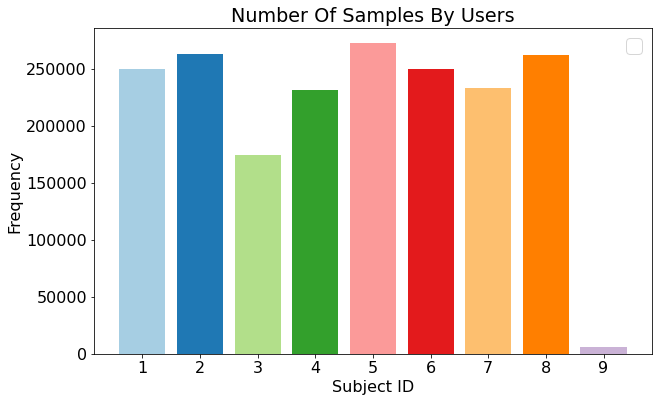

In [70]:
sampels = DataSource.groupby(['subject_id']).count().reset_index()
sampels_to_subject = pd.DataFrame()
sampels_to_subject['subject_id'] = sampels['subject_id']
sampels_to_subject['activityID'] = sampels['timestamp']
sampels_to_subject = sampels_to_subject.sort_values(by=['subject_id'])
pd_fast_plot(sampels_to_subject,'activityID','subject_id','Number Of Samples By Users')

In the cell below I have grouped the data set with respect to the heartrate and Activity ID. The idea is to check if all the activities recorded similar heart rate or if there is major difference between the heart rates while performing different activities. As we can see from the graph below activities like running and rope jumping have the highest heart rate and activities like ironing have heart rate lower than others. Few of the activities like watching TV or Computer work are not in the graph as the subjects did not perfrom them.

<AxesSubplot:title={'center':'Graph of heart rate with respect to Activity'}, xlabel='activityID', ylabel='Heart Rate'>

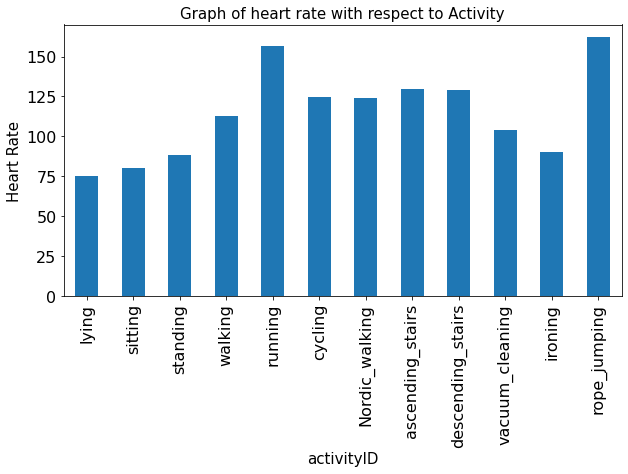

In [15]:
Heart_activity = training_data['heartrate'].groupby(training_data['activityID']).mean()
Heart_activity.index = Heart_activity.index.map(activityIDdict)
plt.ylabel("Heart Rate", fontsize = 15)
plt.xlabel("activityID", fontsize = 15)
plt.title("Graph of heart rate with respect to Activity", fontsize = 15)
Heart_activity.plot(kind='bar', figsize =(10,5))

In the cell below I have grouped the data with respect to subject ID and heartrate to check which subject ID had the highest heart rate. As we can see subject ID 9 had the highest average heart rate and subject ID 9 has the lowest heart rate

<ipython-input-69-f52bc56b46b5>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  a = ax.set_xticklabels(pd[column_b])
No handles with labels found to put in legend.


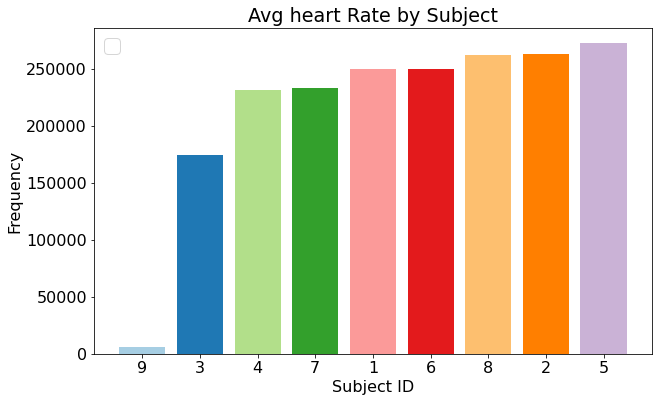

In [71]:
sampels_heart_rate = pd.DataFrame()
sampels_heart_rate['subject_id'] = sampels['subject_id']
sampels_heart_rate['heartrate'] = sampels['heartrate']
sampels_heart_rate = sampels_heart_rate.sort_values(by=['heartrate'])
pd_fast_plot(sampels_heart_rate,'heartrate','subject_id','Avg heart Rate by Subject')

We are going to focus on heart rate as it is our most precice meter of check for tracking subjects during activities as implied by the various indications on the readme file of the dataset. With that in mind, looking at the table, we can observe that the mean heart rate throughout the dataset is 107.4 . Furthermore the minimum heart rate is 57 and the maximum heart rate is 202. The quartiles that are shown can be further analysed by plotting a box plot which will help with understanding our outliers and quartiles groups and also shown the mean of our data's heart rate.

Looking at the box plot, we can see that the outliers have heart rate from 180 up to 202. Our highest quartile group out of the four starts from 124 which is the end of the Inter-quartile range and finishes at 180 which also makes it our biggest group by looking at the size of it on the box plot compared to the other quartiles. Meaning that the biggest amount of subjects on the activities performed had heart rate of 124 up to 180. Our third quartile group starts from the mean value which is 107.4 which is where the horizontal line in our box is, and finishes at the end of the Inter-quartile range which is 124. Our second quartile group, starts from the start of the Inter-quartile range which is 86 and ends at the mean value 124. Our first quartile group starts from the lowest data point, 57 and ends at the start of the Inter-quartile range 86. Our box plot also shows that most subjects performed some activities at a statistically similar way but failed to do the same in all activities which explains the big upper quartile group.

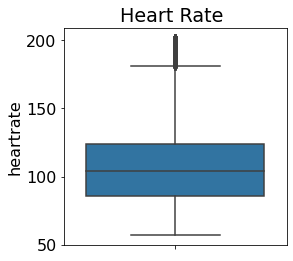

In [17]:

fig, ax = plt.subplots(figsize=(4,4))
plt.title("Heart Rate ")
ax = sns.boxplot(y=training_data["heartrate"])

In the cell below I have grouped the data with respect to activity ID, Heart Rate, Accelerations, Timestamp, temperature. In the below graph I will be exploring the heart rate with respect to time stamp. As it can be seen from the graph it is steady and straight. 

<ipython-input-18-395eca9811dc>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  HeartrateCheck= training_data.groupby('activityID')['heartrate','handAcc16_1', 'handAcc16_2', 'handAcc16_3', 'ankleGyro2','ankleGyro3', 'timestamp', 'handTemperature'].mean()


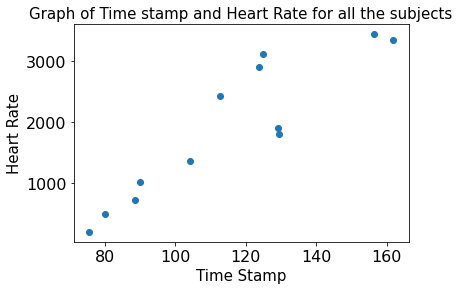

In [18]:
HeartrateCheck= training_data.groupby('activityID')['heartrate','handAcc16_1', 'handAcc16_2', 'handAcc16_3', 'ankleGyro2','ankleGyro3', 'timestamp', 'handTemperature'].mean()
#ax1 = plt.subplot(212)
x1= HeartrateCheck['heartrate']
y1= HeartrateCheck['timestamp']
z=np.polyfit(x1,y1,1)
plt.scatter(x1, y1)
plt.xlabel('Time Stamp', fontsize = '15')
plt.ylabel('Heart Rate', fontsize = '15')
plt.title('Graph of Time stamp and Heart Rate for all the subjects', fontsize = '15')
plt.show()

In [19]:
ActivityID2={value:key for key,value in activityIDdict.items()}


In the below cell, I have grouped the data with respect to heart rate, activities, hand temperature, chest temperature and ankle temperature. This will give us insight if there is any chnage in the temperature of the body while performing the activities. As we can see from the graph below, there is not much difference in the temperature level for hand, chest and ankle during all the actvities , except we can see a slight(negligible) drop in temperatures for Activities - Running and rope jumping

<ipython-input-20-77dfdb96f482>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temperature_series = training_data.groupby('activityID')['heartrate', 'handTemperature', 'chestTemperature', 'ankleTemperature'].mean()


Text(0, 0.5, 'Heart Rate')

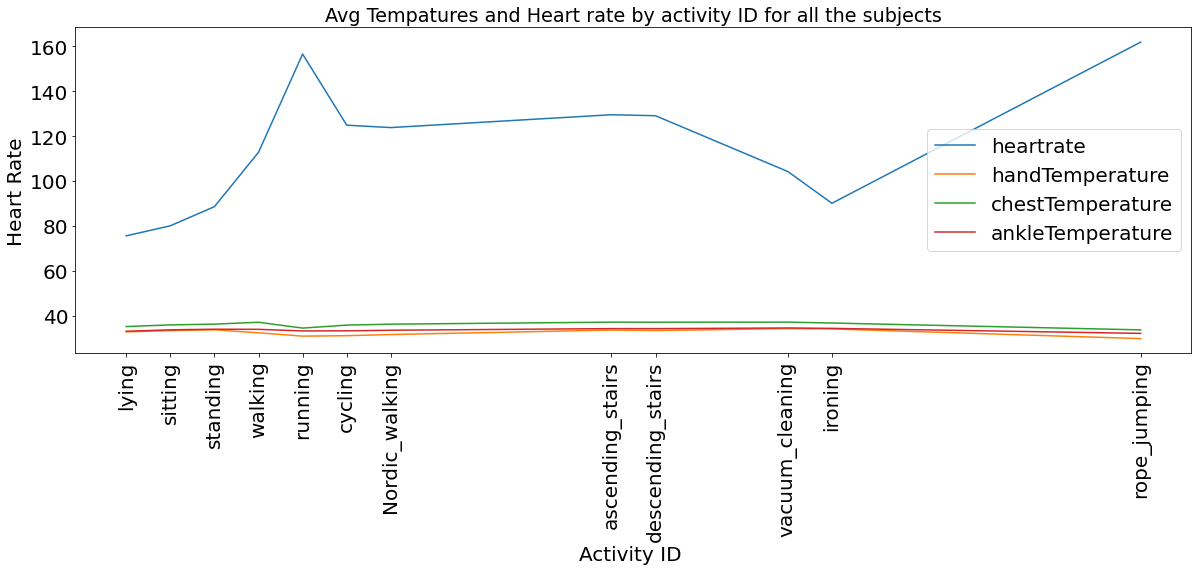

In [20]:

temperature_series = training_data.groupby('activityID')['heartrate', 'handTemperature', 'chestTemperature', 'ankleTemperature'].mean()
ax = temperature_series.plot(kind='line', figsize=(20,6), title='Avg Tempatures and Heart rate by activity ID for all the subjects', fontsize = 20)
b = ax.legend(fontsize = 20)
ax.set_xticks(list(DataSource["activityID"].unique()))
ax.set_xticklabels(list(activityIDdict[x] for x in list(DataSource["activityID"].unique())))
plt.xticks(rotation=90)
plt.xlabel('Activity ID ', fontsize = 20)
plt.ylabel('Heart Rate', fontsize = 20)

In the below cells I have grouped the data with respect to Activities, Heart rates and chest and ankle gyro. As we can see from the graph there is no differnece in the readings of the activties. The readings are constant for all.

<ipython-input-21-05020a2d38b0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gyro_series = training_data.groupby('activityID')['heartrate', 'chestGyro1','chestGyro2', 'chestGyro3'].mean()


Text(0, 0.5, 'Heart Rate')

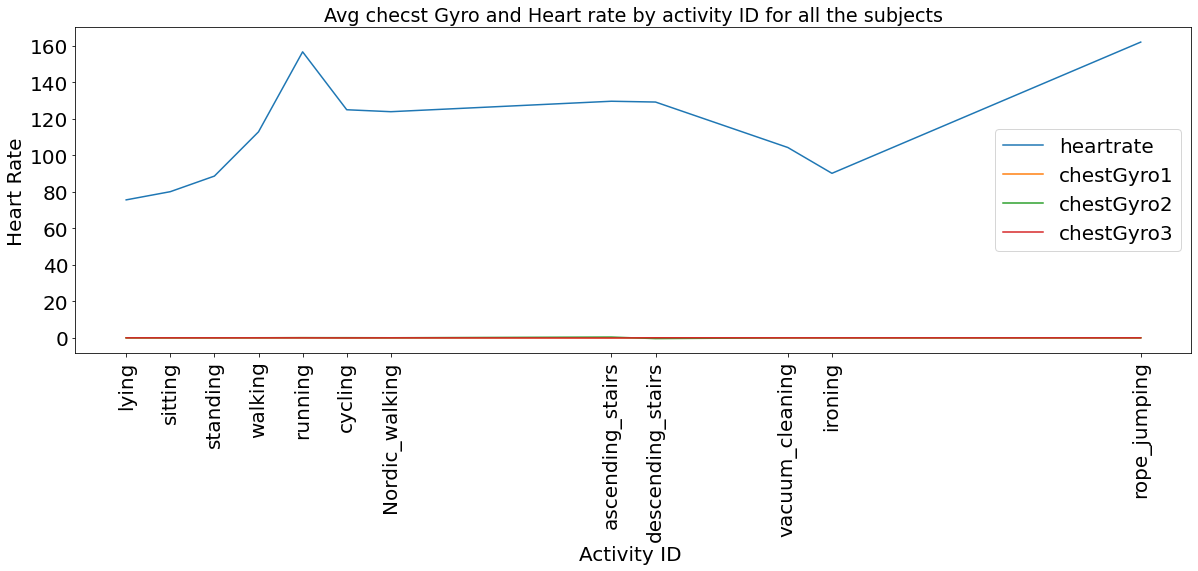

In [21]:
gyro_series = training_data.groupby('activityID')['heartrate', 'chestGyro1','chestGyro2', 'chestGyro3'].mean()
ax = gyro_series.plot(kind='line', figsize=(20,6), title='Avg checst Gyro and Heart rate by activity ID for all the subjects', fontsize = 20)
b = ax.legend(fontsize = 20)
ax.set_xticks(list(DataSource["activityID"].unique()))
ax.set_xticklabels(list(activityIDdict[x] for x in list(DataSource["activityID"].unique())))
plt.xticks(rotation=90)
plt.xlabel('Activity ID ', fontsize = 20)
plt.ylabel('Heart Rate', fontsize = 20)

<ipython-input-22-cbd514bc9c96>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gyro_series1 = training_data.groupby('activityID')['heartrate', 'ankleGyro1','ankleGyro2', 'ankleGyro3'].mean()


Text(0, 0.5, 'Heart Rate')

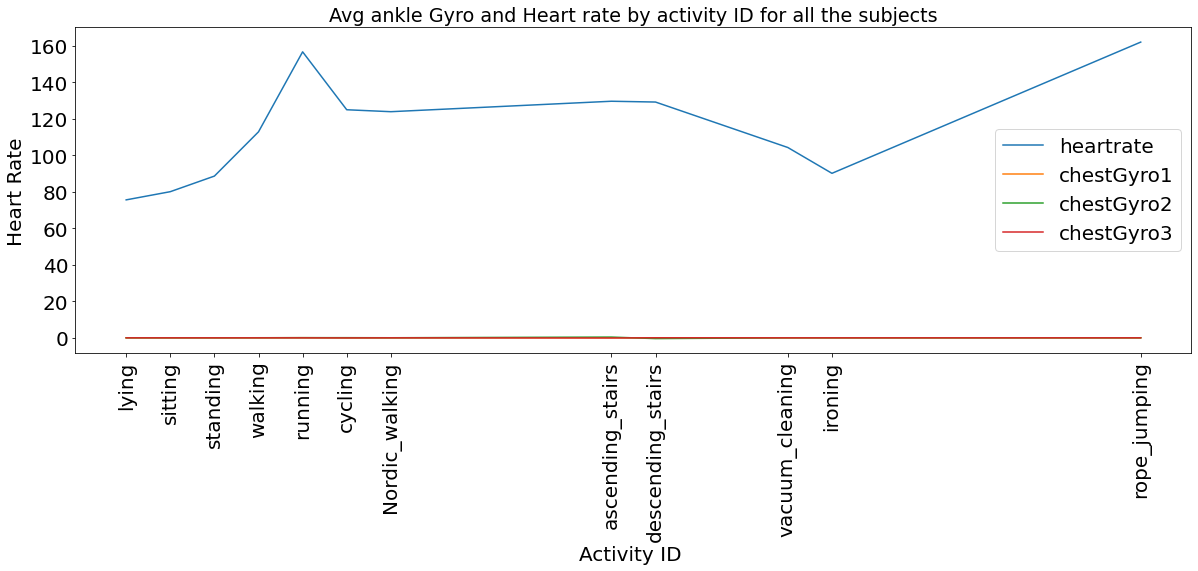

In [22]:
gyro_series1 = training_data.groupby('activityID')['heartrate', 'ankleGyro1','ankleGyro2', 'ankleGyro3'].mean()
ax = gyro_series.plot(kind='line', figsize=(20,6), title='Avg ankle Gyro and Heart rate by activity ID for all the subjects', fontsize = 20)
b = ax.legend(fontsize = 20)
ax.set_xticks(list(DataSource["activityID"].unique()))
ax.set_xticklabels(list(activityIDdict[x] for x in list(DataSource["activityID"].unique())))
plt.xticks(rotation=90)
plt.xlabel('Activity ID ', fontsize = 20)
plt.ylabel('Heart Rate', fontsize = 20)

In the below cells I have grouped the data with respect to activity ID, heat rate , ankle Manget, hand magnet and chest magnet readings. As we can see from the graphs ironing, vaccum cleaning, Running, cycling , rope jumping have a better reading of ankle, hand and chest magents. This is because while doing these activities there were movement of hands, ankles and inturn the heat rate. 

<ipython-input-23-7bef2038eabb>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  magnet_series = training_data.groupby('activityID')['heartrate', 'ankleMagne1', 'ankleMagne2', 'ankleMagne3'].mean()


Text(0, 0.5, 'Heart Rate')

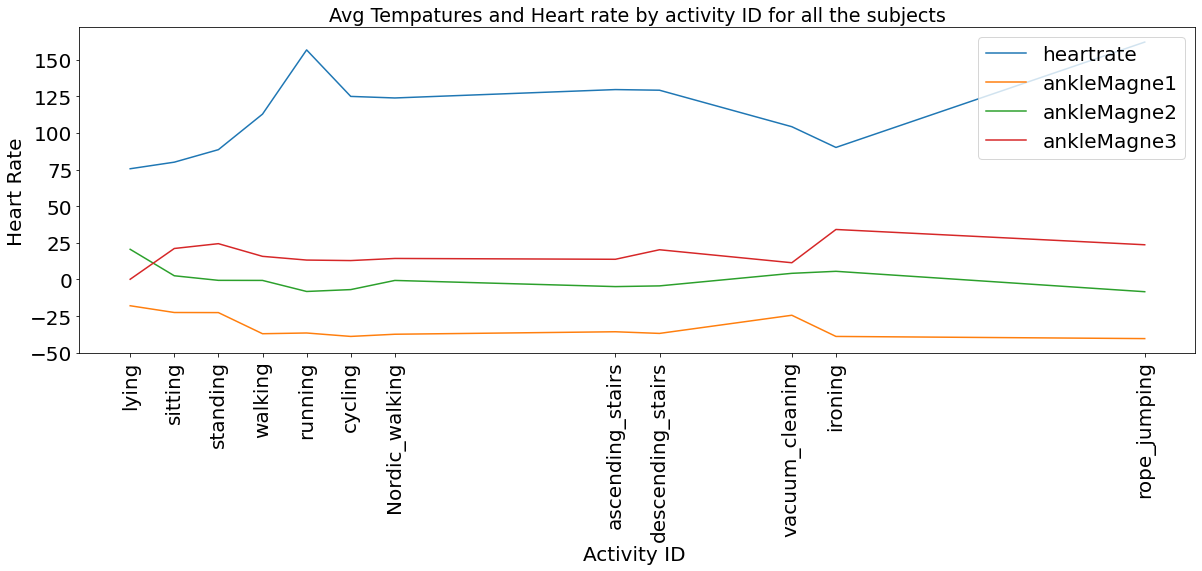

In [23]:
magnet_series = training_data.groupby('activityID')['heartrate', 'ankleMagne1', 'ankleMagne2', 'ankleMagne3'].mean()
ax = magnet_series.plot(kind='line', figsize=(20,6), title='Avg Tempatures and Heart rate by activity ID for all the subjects', fontsize = 20)
b = ax.legend(fontsize = 20)
ax.set_xticks(list(DataSource["activityID"].unique()))
ax.set_xticklabels(list(activityIDdict[x] for x in list(DataSource["activityID"].unique())))
plt.xticks(rotation=90)
plt.xlabel('Activity ID ', fontsize = 20)
plt.ylabel('Heart Rate', fontsize = 20)

<ipython-input-24-4b21d5398dc0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  magnet_series1 = training_data.groupby('activityID')['heartrate', 'chestMagne1', 'chestMagne2', 'chestMagne3'].mean()


Text(0, 0.5, 'Heart Rate')

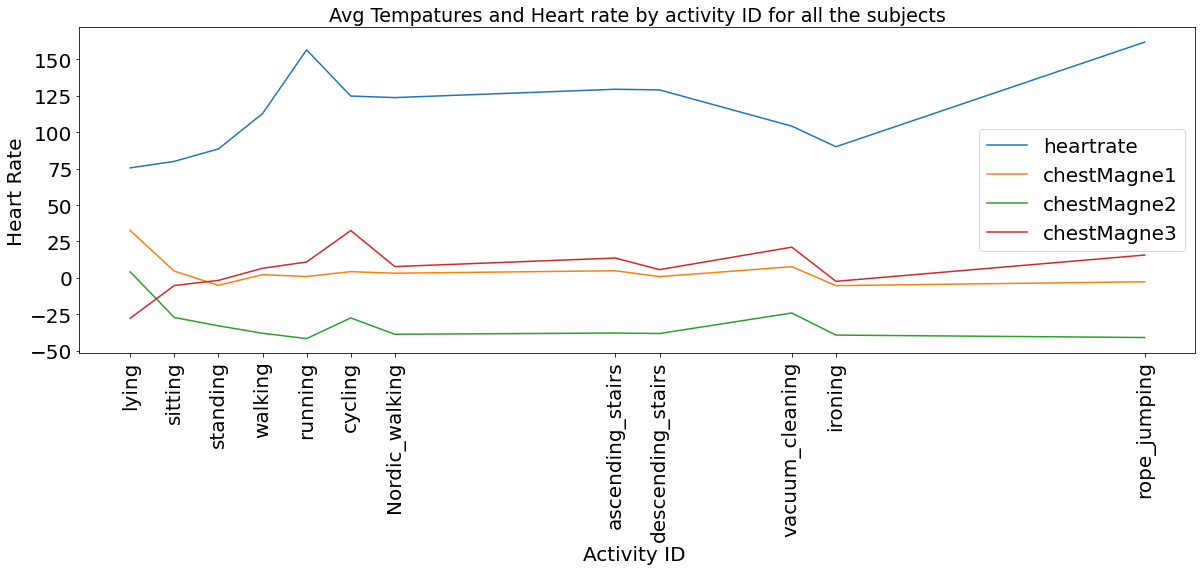

In [24]:
magnet_series1 = training_data.groupby('activityID')['heartrate', 'chestMagne1', 'chestMagne2', 'chestMagne3'].mean()
ax = magnet_series1.plot(kind='line', figsize=(20,6), title='Avg Tempatures and Heart rate by activity ID for all the subjects', fontsize = 20)
b = ax.legend(fontsize = 20)
ax.set_xticks(list(DataSource["activityID"].unique()))
ax.set_xticklabels(list(activityIDdict[x] for x in list(DataSource["activityID"].unique())))
plt.xticks(rotation=90)
plt.xlabel('Activity ID ', fontsize = 20)
plt.ylabel('Heart Rate', fontsize = 20)

<ipython-input-25-e6623e7e6a1d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  magnet_series2 = training_data.groupby('activityID')['heartrate', 'handMagne1', 'handMagne2', 'handMagne3'].mean()


Text(0, 0.5, 'Heart Rate')

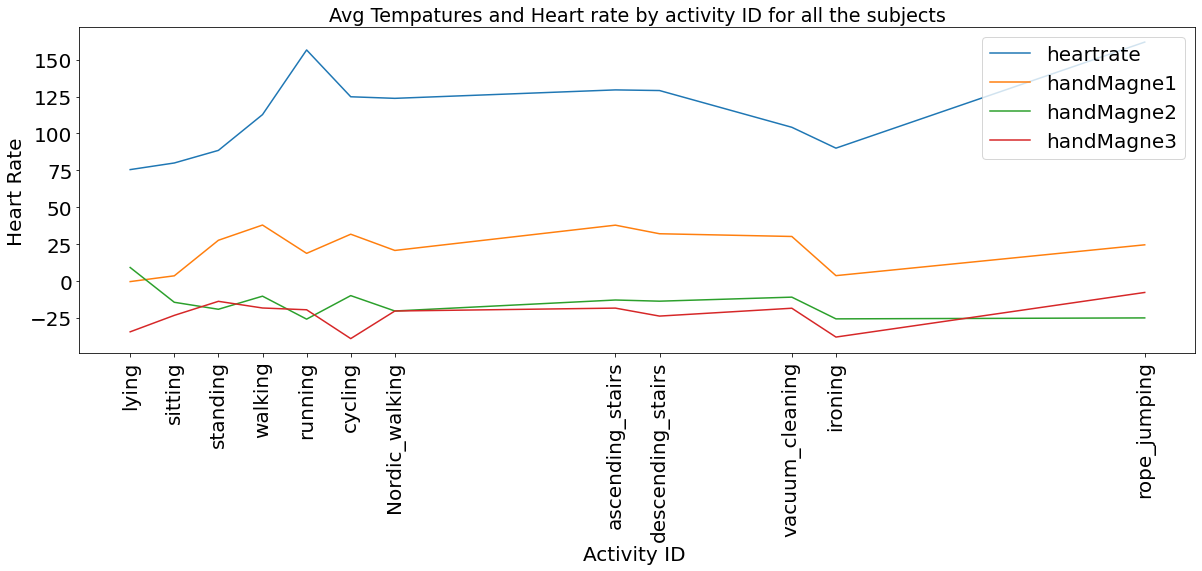

In [25]:
magnet_series2 = training_data.groupby('activityID')['heartrate', 'handMagne1', 'handMagne2', 'handMagne3'].mean()
ax = magnet_series2.plot(kind='line', figsize=(20,6), title='Avg Tempatures and Heart rate by activity ID for all the subjects', fontsize = 20)
b = ax.legend(fontsize = 20)
ax.set_xticks(list(DataSource["activityID"].unique()))
ax.set_xticklabels(list(activityIDdict[x] for x in list(DataSource["activityID"].unique())))
plt.xticks(rotation=90)
plt.xlabel('Activity ID ', fontsize = 20)
plt.ylabel('Heart Rate', fontsize = 20)

To check further on our data to see any anormalities, we have to plot a heat map which will show whether our data has correlations inbetween it. All columns will be used in order to understand the extend of problems, if there are any.

Our heatmap shows how much statistical similarity there is between our different columns. We can every easily observe that the gyroscopes do not correlate with any of our other data and seem unneeded in this model. On the other hand we can understand the correlation between accelerometers of the hand and temperature. The two are strongly correlated on all three instances of hand accelerometers. Furthermore the chest Magnetometers seem to be correlated with heart rate and it is very logical as they very close together on the body.

<ipython-input-26-c92a97c2ddf1>:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype=np.bool), cmap = "twilight",ax=ax)


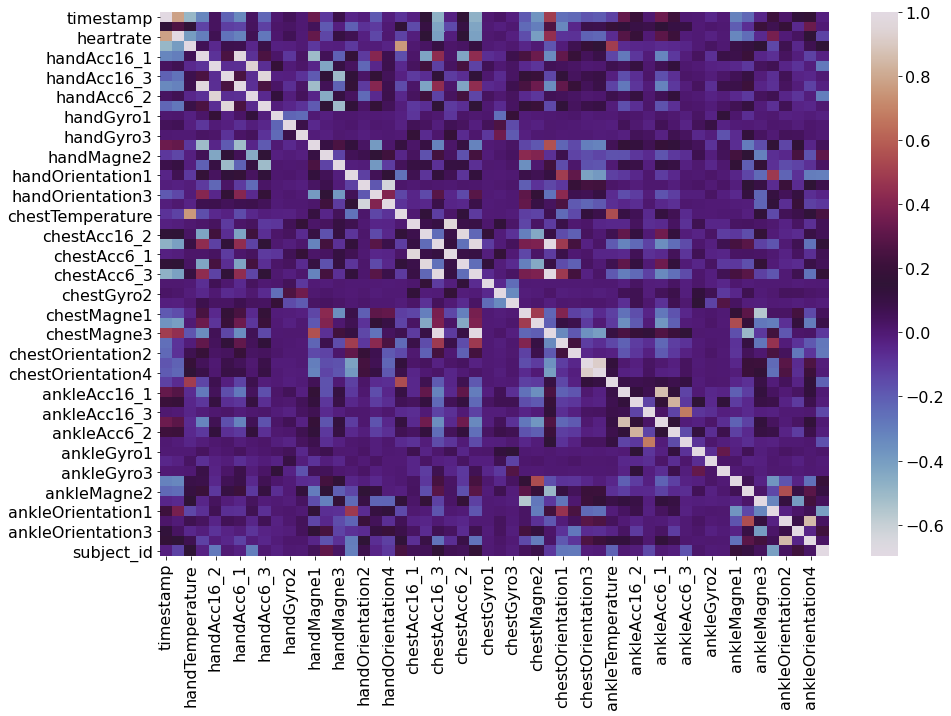

In [26]:
from pandas.plotting import scatter_matrix
df_corr = training_data.corr()
df_corr = df_corr.drop(['activityID'], axis = 1)

                                                                                   
                                                                                   
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype=np.bool), cmap = "twilight",ax=ax)
plt.show()

Next I have created a new Data Frame "Subject1df" which includes all the columns from training data. From this data frame we will get the values of activities performed by each user in the table. For the subjects who have not performed the activities, the value is replaced by 0. In this way we can see which subject perfromed which type of activities and try to see the differnece. 

In [27]:

for i in range(1,10):
    globals()["subject%sdf" %i]=training_data.loc[training_data["subject_id"]==i]
    globals()["subject%sdf" %i].reset_index(drop=True, inplace=True)


In [28]:
subject1df

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
0,1926.37,12,167.909091,33.6875,-11.231400,2.967660,2.325040,-10.353600,2.97821,2.293150,...,0.669698,-0.143689,-51.72180,33.83850,-6.57162,1.0,0.0,0.0,0.0,1
1,976.79,17,97.000000,33.3125,5.867270,4.818160,-0.581048,6.224430,4.27515,-0.928009,...,-0.215370,-0.018326,-56.81180,-15.37650,41.46630,1.0,0.0,0.0,0.0,1
2,1025.73,17,99.000000,33.3125,-4.958250,2.286410,8.001970,-4.983240,3.17141,8.116130,...,0.021957,-0.018897,-53.10660,-10.44880,51.14330,1.0,0.0,0.0,0.0,1
3,1001.87,17,100.000000,33.3125,-1.052370,2.155910,9.561930,-0.968154,1.83047,10.198900,...,-0.032327,0.019034,-58.43390,-8.22714,47.49720,1.0,0.0,0.0,0.0,1
4,115.06,1,90.000000,31.0000,0.389526,5.772270,7.916370,0.478228,5.74457,7.984100,...,-0.021625,0.008267,-14.21800,45.18770,-5.39573,1.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199881,123.77,1,88.090909,31.0625,0.311006,5.734250,7.838340,0.449099,5.82033,8.029270,...,-0.024353,-0.019451,-13.76530,44.51800,-6.02547,1.0,0.0,0.0,0.0,1
199882,2725.87,7,141.000000,32.1875,-3.432680,0.429848,1.180330,-6.352390,3.90071,2.226640,...,-0.159021,-0.188715,-53.14160,-22.16910,-30.92290,1.0,0.0,0.0,0.0,1
199883,357.00,2,91.000000,32.0625,-0.239610,8.818910,4.394310,-0.126731,8.67577,4.761840,...,-0.023463,-0.010836,-11.90120,35.16300,71.34500,1.0,0.0,0.0,0.0,1
199884,3151.30,5,126.000000,31.0000,5.943540,6.493900,0.184189,6.068500,5.98402,0.336871,...,-0.197152,-0.663844,3.13303,23.18970,52.15620,1.0,0.0,0.0,0.0,1


In [29]:
sub1 = subject1df.iloc[:,[1,54]]
sub2= subject2df.iloc[:,[1,54]]
sub3= subject3df.iloc[:,[1,54]]
sub4 =subject4df.iloc[:,[1,54]]
sub5= subject5df.iloc[:,[1,54]]
sub6=subject6df.iloc[:,[1,54]]
sub7=subject7df.iloc[:,[1,54]]
sub8=subject8df.iloc[:,[1,54]]
sub9=subject9df.iloc[:,[1,54]]
headers = ["Subject101", "Subject102", "Subject103", "Subject104", "Subject105", "Subject106", "Subject107", "Subject108", "Subject109"]

subject_Activity_Series = pd.DataFrame([sub1.activityID, sub2.activityID, sub3.activityID, sub4.activityID, sub5.activityID, sub6.activityID, sub7.activityID, sub8.activityID, sub9.activityID]).transpose()
subject_Activity_Series.head(100)

,activityID,activityID,activityID,activityID,activityID,activityID,activityID,activityID,activityID
0,12.0,3.0,3.0,12.0,24.0,1.0,3.0,2.0,24.0
1,17.0,16.0,17.0,4.0,1.0,16.0,1.0,7.0,24.0
2,17.0,17.0,12.0,12.0,2.0,2.0,6.0,3.0,24.0
3,17.0,7.0,17.0,16.0,4.0,12.0,4.0,16.0,24.0
4,1.0,17.0,4.0,2.0,4.0,16.0,6.0,4.0,24.0
...,...,...,...,...,...,...,...,...,...
95,4.0,2.0,12.0,16.0,4.0,7.0,17.0,4.0,24.0
96,5.0,3.0,4.0,4.0,17.0,1.0,2.0,7.0,24.0
97,1.0,12.0,3.0,3.0,6.0,2.0,17.0,13.0,24.0
98,24.0,4.0,1.0,17.0,12.0,7.0,16.0,5.0,24.0


From the "subject1df" created above I have grouped few subjects with respect to heartrate, timestamp, hand , chest and ankle acceleration. Below I will be focusing on the effect of hand acceleration required for each type of actvity and the variation of heart rate associated with it. 

To find the total hand acceleartion I have used formula - 
sqrt(HandAcceleration_1 ^2 + handAcceleartion_2 ^2+handAcceleartion_3 ^2)

To find the total chest and ankle acceleration I have added the values toghether. 

Next I have added 3 new columns to this data to store the total acceleation values. The column names are total_hand_acceleartion, total_chest_acceleartion and total_ankle_acceleartion. For analysis purpose I will be comparing the heart rate with total hand acceleartion 

# Comparing Activities with respesct to Heart rate and Acceleartion of hands, chest and ankles for subject 1

In [31]:
subject1_act1 = subject1df[['timestamp', 'heartrate', 'handAcc16_1', 'handAcc16_2', 'handAcc16_3', 'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 'ankleAcc16_1','ankleAcc16_2', 'ankleAcc16_3']].loc[subject1df["activityID"]==1]
subject1_act1 = subject1_act1.sort_values(by='timestamp')
subject1_act1.reset_index(drop=True, inplace=True)
subject1_act1['total_hand_acceleration']= np.sqrt((subject1_act1['handAcc16_1']**2)+(subject1_act1['handAcc16_2']**2)+(subject1_act1['handAcc16_3']**2))
subject1_act1['total_chest_acceleration']= np.sqrt((subject1_act1['chestAcc16_1']**2)+(subject1_act1['chestAcc16_2']**2)+(subject1_act1['chestAcc16_3']**2))
subject1_act1['total_ankle_acceleration']= np.sqrt((subject1_act1['ankleAcc16_1']**2)+(subject1_act1['ankleAcc16_2']**2)+(subject1_act1['ankleAcc16_3']**2))



In [32]:
subject1_act1

,timestamp,heartrate,handAcc16_1,handAcc16_2,handAcc16_3,chestAcc16_1,chestAcc16_2,chestAcc16_3,ankleAcc16_1,ankleAcc16_2,ankleAcc16_3,total_hand_acceleration,total_chest_acceleration,total_ankle_acceleration
0,37.66,100.0,2.21530,8.27915,5.58753,0.124482,9.65003,-1.65181,9.73855,-1.847610,0.095156,10.230952,9.791172,9.912723
1,37.67,100.0,2.29196,7.67288,5.74467,0.200711,9.64980,-1.65043,9.69762,-1.884380,-0.020804,9.855324,9.791979,9.879026
2,37.68,100.0,2.29090,7.14240,5.82342,0.270277,9.72331,-1.88174,9.69633,-1.922030,-0.059173,9.496016,9.907409,9.885166
3,37.69,100.0,2.21800,7.14365,5.89930,0.236737,9.72447,-1.72746,9.66370,-1.847140,0.094385,9.526437,9.879549,9.839102
4,37.70,100.0,2.30106,7.25857,6.09259,0.352225,9.72437,-1.68665,9.77578,-1.885820,0.095775,9.751993,9.875840,9.956473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21756,309.45,90.0,2.24361,9.27949,2.92895,0.853533,9.76177,-1.48409,9.80813,-0.314801,-1.688760,9.986064,9.910762,9.957431
21757,309.47,90.0,2.24173,9.39263,2.85156,0.809600,9.72294,-1.67836,9.74188,-0.354866,-1.380480,10.068676,9.899894,9.845602
21758,309.48,90.0,2.12997,9.24242,2.92737,0.809202,9.57233,-1.67788,9.89017,-0.203297,-1.457080,9.926157,9.751902,9.998994
21759,309.51,90.0,2.20261,9.20323,2.85162,0.967777,9.72376,-1.48189,9.77440,-0.239591,-1.573810,9.883454,9.883527,9.903190


Here I have grouped subject1's heart rate and hand acceleartion, chest acceleartion and ankle acceleration with respect to the first activity which is lying. As we can see from the graphs the acceleartion of hand, chest and ankle is stable as there is not much movement. The heart rate is also stable. There is some tracking in the graph of ankle acceleation,but it may be due to small movements of the legs which cannot be considered as activity

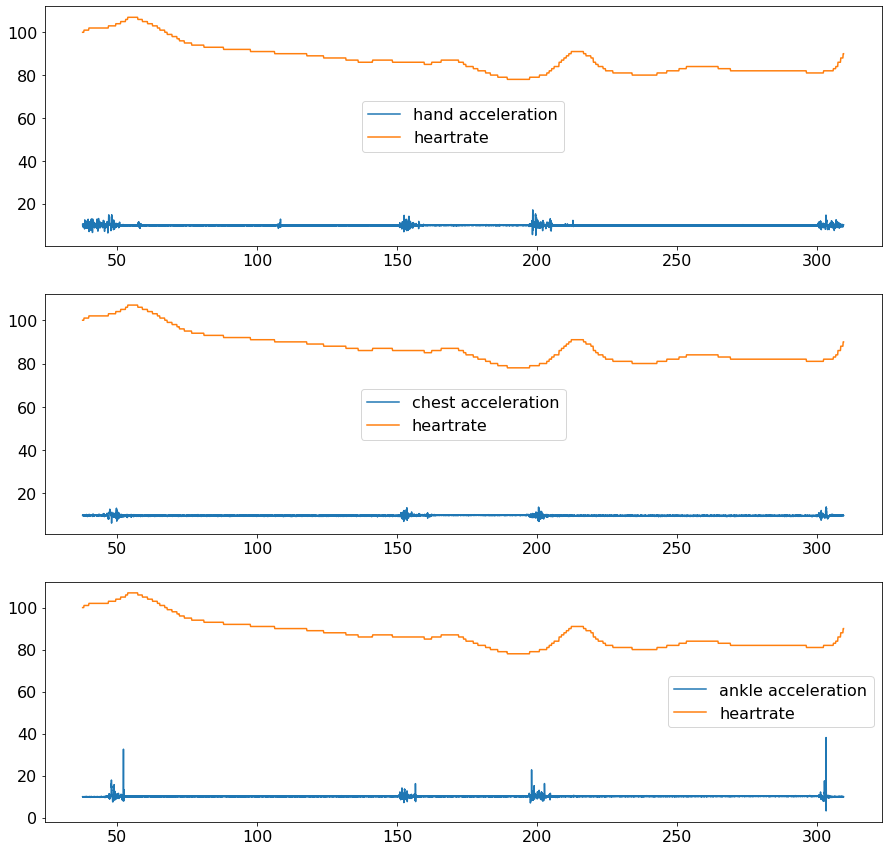

In [33]:
fig, axs = plt.subplots(3, figsize=(15,15))
axs[0].plot(subject1_act1['timestamp'],subject1_act1['total_hand_acceleration'], label='hand acceleration')
axs[0].plot(subject1_act1['timestamp'],subject1_act1['heartrate'], label='heartrate')
axs[0].legend(loc='center')
axs[1].plot(subject1_act1['timestamp'], subject1_act1['total_chest_acceleration'], label ='chest acceleration')
axs[1].plot(subject1_act1['timestamp'],subject1_act1['heartrate'], label='heartrate')
axs[1].legend(loc='center')
axs[2].plot(subject1_act1['timestamp'], subject1_act1['total_ankle_acceleration'], label ='ankle acceleration')
axs[2].plot(subject1_act1['timestamp'],subject1_act1['heartrate'], label='heartrate')
plt.legend()
plt.show()

In [34]:
subject1_act2 = subject1df[['timestamp', 'heartrate', 'handAcc16_1', 'handAcc16_2', 'handAcc16_3', 'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 'ankleAcc16_1','ankleAcc16_2', 'ankleAcc16_3']].loc[subject1df["activityID"]==2]
subject1_act2 = subject1_act2.sort_values(by='timestamp')
subject1_act2.reset_index(drop=True, inplace=True)
subject1_act2['total_hand_acceleration']= np.sqrt((subject1_act2['handAcc16_1']**2)+(subject1_act2['handAcc16_2']**2)+(subject1_act2['handAcc16_3']**2))
subject1_act2['total_chest_acceleration']= np.sqrt((subject1_act1['chestAcc16_1']**2)+(subject1_act2['chestAcc16_2']**2)+(subject1_act2['chestAcc16_3']**2))
subject1_act2['total_ankle_acceleration']= np.sqrt((subject1_act2['ankleAcc16_1']**2)+(subject1_act2['ankleAcc16_2']**2)+(subject1_act2['ankleAcc16_3']**2))


Here I have grouped subject1's heart rate and hand acceleartion, chest acceleartion and ankle acceleration with respect to the second activity which is sitting. As we can see from the graphs the acceleartion of hand, chest and ankle is stable as there is not much movement. The heart rate is also stable. There is some tracking in the graph of ankle acceleation and chest acceleartion,but it may be due to small movements of the legs and shoulders which cannot be considered as activity

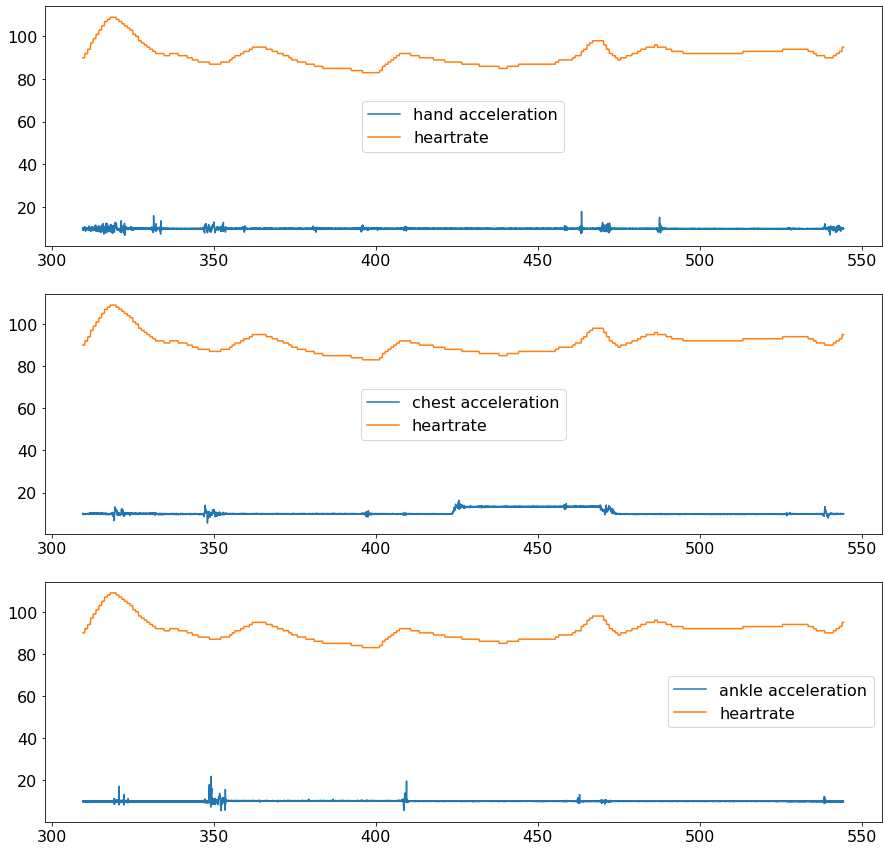

In [35]:
fig, axs = plt.subplots(3, figsize=(15,15))
axs[0].plot(subject1_act2['timestamp'],subject1_act2['total_hand_acceleration'], label='hand acceleration')
axs[0].plot(subject1_act2['timestamp'],subject1_act2['heartrate'], label='heartrate')
axs[0].legend(loc='center')
axs[1].plot(subject1_act2['timestamp'], subject1_act2['total_chest_acceleration'], label ='chest acceleration')
axs[1].plot(subject1_act2['timestamp'],subject1_act2['heartrate'], label='heartrate')
axs[1].legend(loc='center')
axs[2].plot(subject1_act2['timestamp'], subject1_act2['total_ankle_acceleration'], label ='ankle acceleration')
axs[2].plot(subject1_act2['timestamp'],subject1_act2['heartrate'], label='heartrate')
plt.legend()
plt.show()

Here I have grouped subject1's heart rate and hand acceleartion, chest acceleartion and ankle acceleration with respect to the 16th activity which is Vaccum Cleaning. As we can see from the graph there is constant fluctuaion in the heart rates and the hand, chest and ankle acceleartion as Vaccum cleaning involves moving from one place to another, using the hands while using the vaccum cleaner. THis suggests that Vaccum Cleaning is tracked properly by the IMU sensors and the HR monitor 

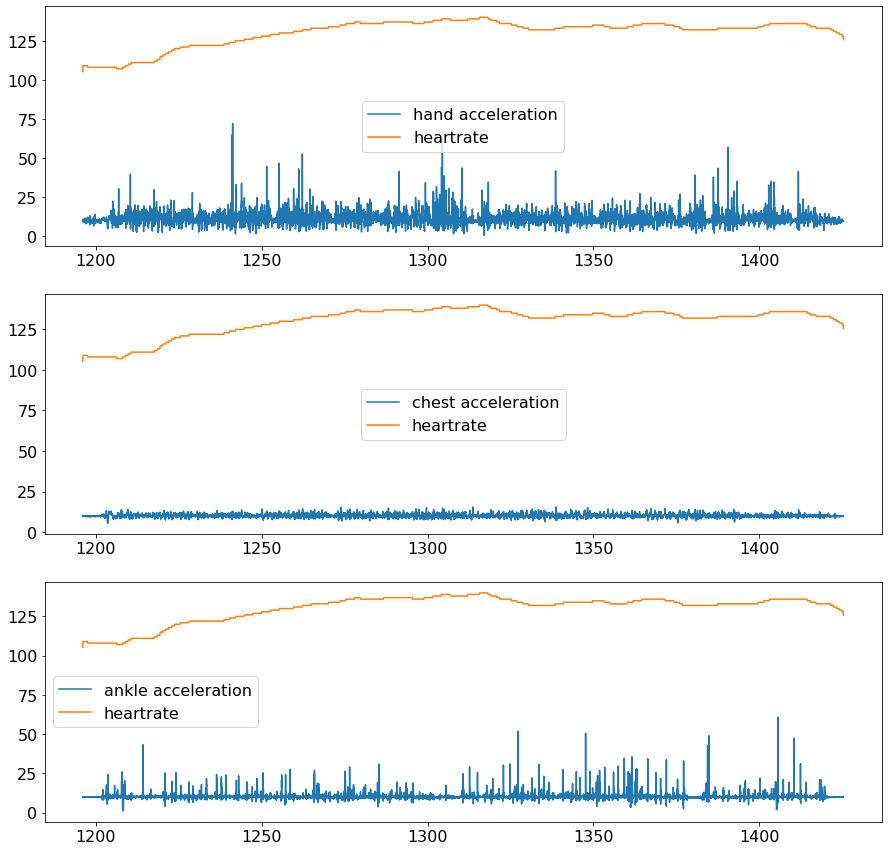

In [36]:
subject1_act16 = subject1df[['timestamp', 'heartrate', 'handAcc16_1', 'handAcc16_2', 'handAcc16_3', 'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 'ankleAcc16_1','ankleAcc16_2', 'ankleAcc16_3']].loc[subject1df["activityID"]==16]
subject1_act16 = subject1_act16.sort_values(by='timestamp')
subject1_act16.reset_index(drop=True, inplace=True)
subject1_act16['total_hand_acceleration']= np.sqrt((subject1_act16['handAcc16_1']**2)+(subject1_act16['handAcc16_2']**2)+(subject1_act16['handAcc16_3']**2))
subject1_act16['total_chest_acceleration']= np.sqrt((subject1_act16['chestAcc16_1']**2)+(subject1_act16['chestAcc16_2']**2)+(subject1_act16['chestAcc16_3']**2))
subject1_act16['total_ankle_acceleration']= np.sqrt((subject1_act16['ankleAcc16_1']**2)+(subject1_act16['ankleAcc16_2']**2)+(subject1_act16['ankleAcc16_3']**2))

fig, axs = plt.subplots(3, figsize=(15,15))
axs[0].plot(subject1_act16['timestamp'],subject1_act16['total_hand_acceleration'], label='hand acceleration')
axs[0].plot(subject1_act16['timestamp'],subject1_act16['heartrate'], label='heartrate')
axs[0].legend(loc='center')
axs[1].plot(subject1_act16['timestamp'], subject1_act16['total_chest_acceleration'], label ='chest acceleration')
axs[1].plot(subject1_act16['timestamp'],subject1_act16['heartrate'], label='heartrate')
axs[1].legend(loc='center')
axs[2].plot(subject1_act16['timestamp'], subject1_act16['total_ankle_acceleration'], label ='ankle acceleration')
axs[2].plot(subject1_act16['timestamp'],subject1_act16['heartrate'], label='heartrate')
plt.legend()
plt.show()

### 

Here I have grouped subject1's heart rate and hand acceleartion, chest acceleartion and ankle acceleration with respect to the 5th activity which is running. Running involes a lot of physical cumbersome activity and it is clear from the above graphs that as the subject 1 is running there is a steady increase in the hand acceleartion, chest acceleartion and highest increase in ankle acceleration. The heart rate is also very high during this activity

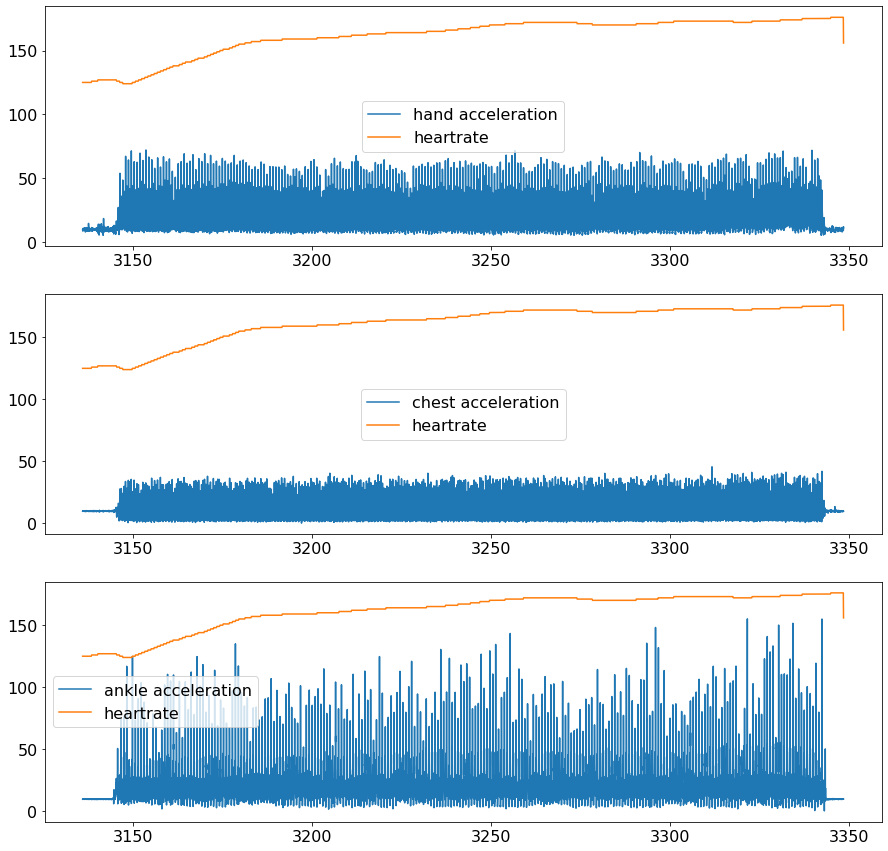

In [37]:
subject1_act5 = subject1df[['timestamp', 'heartrate', 'handAcc16_1', 'handAcc16_2', 'handAcc16_3', 'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 'ankleAcc16_1','ankleAcc16_2', 'ankleAcc16_3']].loc[subject1df["activityID"]==5]
subject1_act5 = subject1_act5.sort_values(by='timestamp')
subject1_act5.reset_index(drop=True, inplace=True)
subject1_act5['total_hand_acceleration']= np.sqrt((subject1_act5['handAcc16_1']**2)+(subject1_act5['handAcc16_2']**2)+(subject1_act5['handAcc16_3']**2))
subject1_act5['total_chest_acceleration']= np.sqrt((subject1_act5['chestAcc16_1']**2)+(subject1_act5['chestAcc16_2']**2)+(subject1_act5['chestAcc16_3']**2))
subject1_act5['total_ankle_acceleration']= np.sqrt((subject1_act5['ankleAcc16_1']**2)+(subject1_act5['ankleAcc16_2']**2)+(subject1_act5['ankleAcc16_3']**2))

fig, axs = plt.subplots(3, figsize=(15,15))
axs[0].plot(subject1_act5['timestamp'],subject1_act5['total_hand_acceleration'], label='hand acceleration')
axs[0].plot(subject1_act5['timestamp'],subject1_act5['heartrate'], label='heartrate')
axs[0].legend(loc='center')
axs[1].plot(subject1_act5['timestamp'], subject1_act5['total_chest_acceleration'], label ='chest acceleration')
axs[1].plot(subject1_act5['timestamp'],subject1_act5['heartrate'], label='heartrate')
axs[1].legend(loc='center')
axs[2].plot(subject1_act5['timestamp'], subject1_act5['total_ankle_acceleration'], label ='ankle acceleration')
axs[2].plot(subject1_act5['timestamp'],subject1_act5['heartrate'], label='heartrate')
plt.legend()
plt.show()

Here I have grouped subject1's heart rate and hand acceleartion, chest acceleartion and ankle acceleration with respect to the 7th activity which is Nordic Walking. Nordic Walking involes a lot of physical cumbersome activity and it is clear from the above graphs that as the subject 1 is running there is a steady increase in the hand acceleartion, chest acceleartion and highest increase in ankle acceleration. The heart rate is also very high during this activity

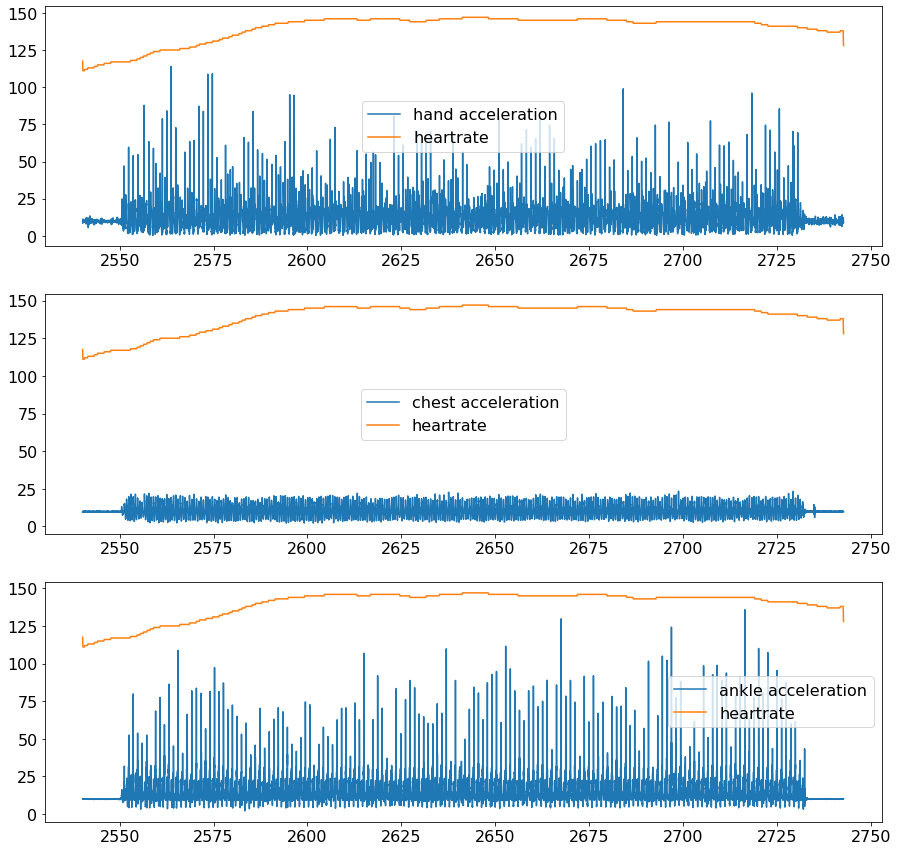

In [38]:
subject1_act7 = subject1df[['timestamp', 'heartrate', 'handAcc16_1', 'handAcc16_2', 'handAcc16_3', 'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 'ankleAcc16_1','ankleAcc16_2', 'ankleAcc16_3']].loc[subject1df["activityID"]==7]
subject1_act7 = subject1_act7.sort_values(by='timestamp')
subject1_act7.reset_index(drop=True, inplace=True)
subject1_act7['total_hand_acceleration']= np.sqrt((subject1_act7['handAcc16_1']**2)+(subject1_act7['handAcc16_2']**2)+(subject1_act7['handAcc16_3']**2))
subject1_act7['total_chest_acceleration']= np.sqrt((subject1_act7['chestAcc16_1']**2)+(subject1_act7['chestAcc16_2']**2)+(subject1_act7['chestAcc16_3']**2))
subject1_act7['total_ankle_acceleration']= np.sqrt((subject1_act7['ankleAcc16_1']**2)+(subject1_act7['ankleAcc16_2']**2)+(subject1_act7['ankleAcc16_3']**2))

fig, axs = plt.subplots(3, figsize=(15,15))
axs[0].plot(subject1_act7['timestamp'],subject1_act7['total_hand_acceleration'], label='hand acceleration')
axs[0].plot(subject1_act7['timestamp'],subject1_act7['heartrate'], label='heartrate')
axs[0].legend(loc='center')
axs[1].plot(subject1_act7['timestamp'], subject1_act7['total_chest_acceleration'], label ='chest acceleration')
axs[1].plot(subject1_act7['timestamp'],subject1_act7['heartrate'], label='heartrate')
axs[1].legend(loc='center')
axs[2].plot(subject1_act7['timestamp'], subject1_act7['total_ankle_acceleration'], label ='ankle acceleration')
axs[2].plot(subject1_act7['timestamp'],subject1_act7['heartrate'], label='heartrate')
plt.legend()
plt.show()

Here I have grouped subject1's heart rate and hand acceleartion, chest acceleartion and ankle acceleration with respect to the 24th activity which is Rope Jumping.Rope Jumping involes a lot of physical cumbersome activity and it is clear from the above graphs that as the subject 1 is running there is a steady increase in the hand acceleartion, chest acceleartion and highest increase in ankle acceleration. The heart rate is also very high during this activity.It is very noticable here that the ankle acceleartion is very high as rope jumping involves a lot of usage of ankles. 

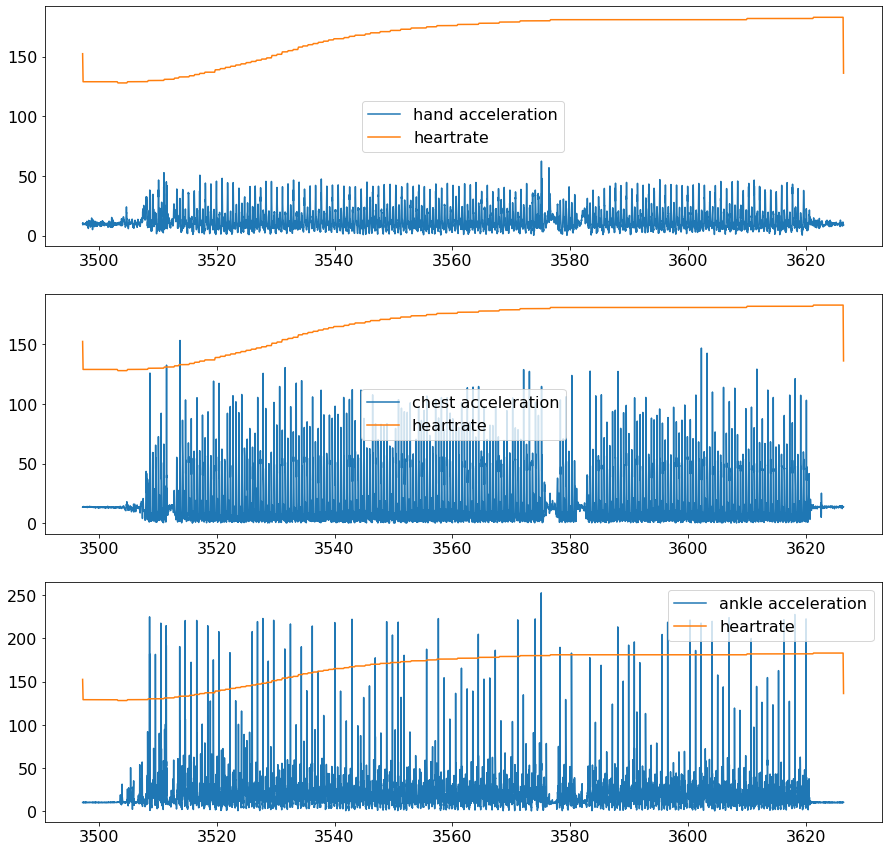

In [39]:
subject1_act24 = subject1df[['timestamp', 'heartrate', 'handAcc16_1', 'handAcc16_2', 'handAcc16_3', 'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 'ankleAcc16_1','ankleAcc16_2', 'ankleAcc16_3']].loc[subject1df["activityID"]==24]
subject1_act24 = subject1_act24.sort_values(by='timestamp')
subject1_act24.reset_index(drop=True, inplace=True)
subject1_act24['total_hand_acceleration']= np.sqrt((subject1_act24['handAcc16_1']**2)+(subject1_act24['handAcc16_2']**2)+(subject1_act24['handAcc16_3']**2))
subject1_act24['total_chest_acceleration']= np.sqrt((subject1_act24['chestAcc16_1']**2)+(subject1_act24['chestAcc16_2']**2)+(subject1_act24['chestAcc16_2']**2))
subject1_act24['total_ankle_acceleration']= np.sqrt((subject1_act24['ankleAcc16_1']**2)+(subject1_act24['ankleAcc16_2']**2)+(subject1_act24['ankleAcc16_2']**2))

fig, axs = plt.subplots(3, figsize=(15,15))
axs[0].plot(subject1_act24['timestamp'],subject1_act24['total_hand_acceleration'], label='hand acceleration')
axs[0].plot(subject1_act24['timestamp'],subject1_act24['heartrate'], label='heartrate')
axs[0].legend(loc='center')
axs[1].plot(subject1_act24['timestamp'], subject1_act24['total_chest_acceleration'], label ='chest acceleration')
axs[1].plot(subject1_act24['timestamp'],subject1_act24['heartrate'], label='heartrate')
axs[1].legend(loc='center')
axs[2].plot(subject1_act24['timestamp'], subject1_act24['total_ankle_acceleration'], label ='ankle acceleration')
axs[2].plot(subject1_act24['timestamp'],subject1_act24['heartrate'], label='heartrate')
plt.legend()
plt.show()

# Comparing Activities with respesct to Heart rate and Acceleartion of hands, chest and ankles for subject 2

Here I have grouped subject4's heart rate and hand acceleartion, chest acceleartion and ankle acceleration with respect to the 7th activity which is Nordic Walking.Nordic Walking involes a lot of physical cumbersome activity and it is clear from the above graphs that as the subject 1 is running there is a steady increase in the hand acceleartion, chest acceleartion and highest increase in ankle acceleration. The heart rate is also very high during this activity. It is very noticalble here that with respect to subject 4 the heart rate is fluctuating constantly. 

In the next graph I have taken 17th activity for subject 4, which is ironing. As ironing involves using of hands and movements of shoulders, the sensors have tracked the activity perfectly. 

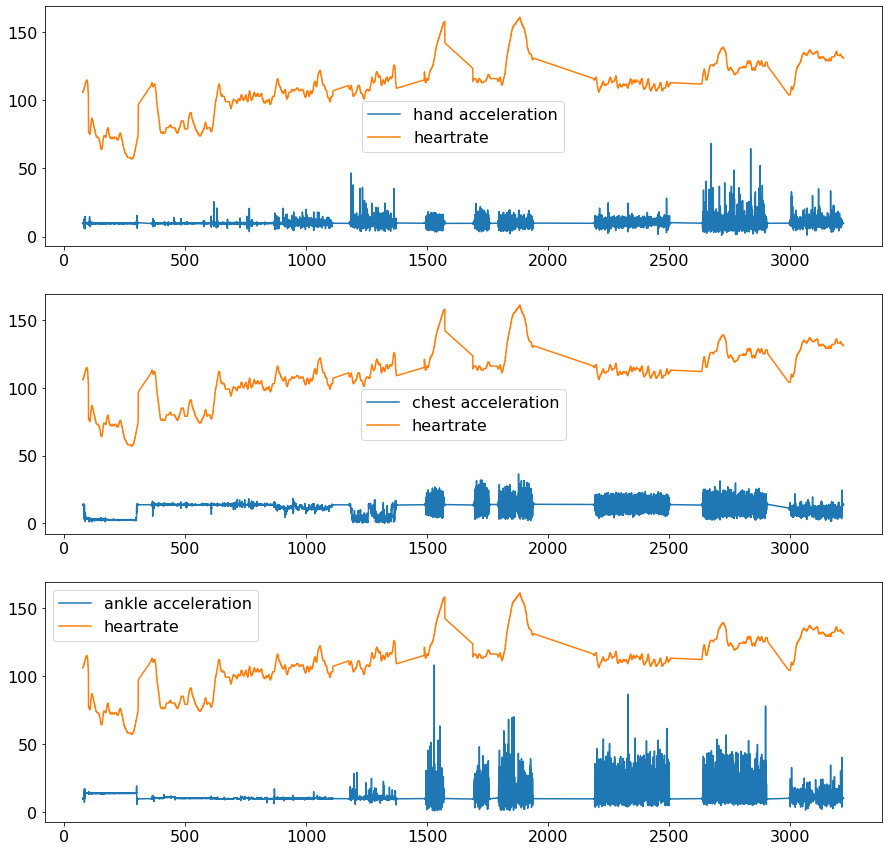

In [40]:
subject4_act7 = subject4df[['timestamp', 'heartrate', 'handAcc16_1', 'handAcc16_2', 'handAcc16_3', 'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 'ankleAcc16_1','ankleAcc16_2', 'ankleAcc16_3']].loc[subject1df["activityID"]==7]
subject4_act7 = subject4_act7.sort_values(by='timestamp')
subject4_act7.reset_index(drop=True, inplace=True)
subject4_act7['total_hand_acceleration']= np.sqrt((subject4_act7['handAcc16_1']**2)+(subject4_act7['handAcc16_2']**2)+(subject4_act7['handAcc16_3']**2))
subject4_act7['total_chest_acceleration']= np.sqrt((subject4_act7['chestAcc16_1']**2)+(subject4_act7['chestAcc16_2']**2)+(subject4_act7['chestAcc16_2']**2))
subject4_act7['total_ankle_acceleration']= np.sqrt((subject4_act7['ankleAcc16_1']**2)+(subject4_act7['ankleAcc16_2']**2)+(subject4_act7['ankleAcc16_2']**2))

fig, axs = plt.subplots(3, figsize=(15,15))
axs[0].plot(subject4_act7['timestamp'],subject4_act7['total_hand_acceleration'], label='hand acceleration')
axs[0].plot(subject4_act7['timestamp'],subject4_act7['heartrate'], label='heartrate')
axs[0].legend(loc='center')
axs[1].plot(subject4_act7['timestamp'], subject4_act7['total_chest_acceleration'], label ='chest acceleration')
axs[1].plot(subject4_act7['timestamp'],subject4_act7['heartrate'], label='heartrate')
axs[1].legend(loc='center')
axs[2].plot(subject4_act7['timestamp'], subject4_act7['total_ankle_acceleration'], label ='ankle acceleration')
axs[2].plot(subject4_act7['timestamp'],subject4_act7['heartrate'], label='heartrate')
plt.legend()
plt.show()

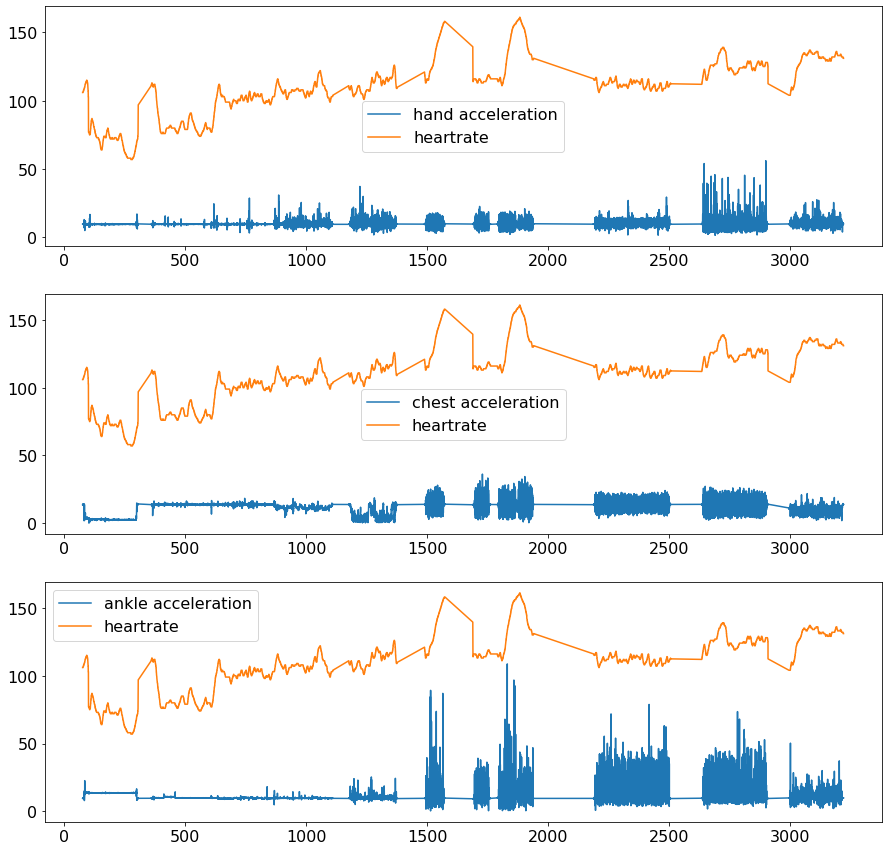

In [41]:
subject4_act17 = subject4df[['timestamp', 'heartrate', 'handAcc16_1', 'handAcc16_2', 'handAcc16_3', 'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 'ankleAcc16_1','ankleAcc16_2', 'ankleAcc16_3']].loc[subject1df["activityID"]==17]
subject4_act17 = subject4_act17.sort_values(by='timestamp')
subject4_act17.reset_index(drop=True, inplace=True)
subject4_act17['total_hand_acceleration']= np.sqrt((subject4_act17['handAcc16_1']**2)+(subject4_act17['handAcc16_2']**2)+(subject4_act17['handAcc16_3']**2))
subject4_act17['total_chest_acceleration']= np.sqrt((subject4_act17['chestAcc16_1']**2)+(subject4_act17['chestAcc16_2']**2)+(subject4_act17['chestAcc16_2']**2))
subject4_act17['total_ankle_acceleration']= np.sqrt((subject4_act17['ankleAcc16_1']**2)+(subject4_act17['ankleAcc16_2']**2)+(subject4_act17['ankleAcc16_2']**2))

fig, axs = plt.subplots(3, figsize=(15,15))
axs[0].plot(subject4_act17['timestamp'],subject4_act17['total_hand_acceleration'], label='hand acceleration')
axs[0].plot(subject4_act17['timestamp'],subject4_act17['heartrate'], label='heartrate')
axs[0].legend(loc='center')
axs[1].plot(subject4_act17['timestamp'], subject4_act17['total_chest_acceleration'], label ='chest acceleration')
axs[1].plot(subject4_act17['timestamp'],subject4_act17['heartrate'], label='heartrate')
axs[1].legend(loc='center')
axs[2].plot(subject4_act17['timestamp'], subject4_act17['total_ankle_acceleration'], label ='ankle acceleration')
axs[2].plot(subject4_act17['timestamp'],subject4_act17['heartrate'], label='heartrate')
plt.legend()
plt.show()

From the above data analysis it is clear that the heart rate is dependant on the total hand chest and ankle acceleation required to perform the activity. If the activity involves a lot of physical movements of hands and ankles the heart rate will be more. If the activity does not involve much physical movemnets, the heart beat will be less. Analyzing this , my conclusion is that cumbersome activities have more heart rate and acceleartion of hands, chest and ankle as compared to activities like lying, standing, ascending stairs etc. 

# Hypothesis

Based on the above data analysis the main focus of testing will be the acceleartion of hands, chest and ankles and the heart rate associated with it. To prove the fact that more the accelartion, more the heart rate, I will be focusing on the heart rate feature more. 

Below is the hypothesis that I will be testing 

H0 - Activities with less Acceleration of hands and ankles have the same heart rate as that of other cumbersome activities


H1 - Activities with more Acceleration of hands and ankles have more heart rate than the activities with less Acceleration of hands and ankles.

In [42]:
import statsmodels.stats.weightstats as stat

IN the cell below, I have created "CumbersomeActivities_data" which contains the data of activties - running, rope jumping, descending stairs and another set of data "Convinient_data" which contains the data of activities - descending stairs, nordic walking, and walking. I will be comparing the average heart rates of these 2 values to validate the hypothesis. As we have earlier proved that activities with high acceleartion have high heart rate I am only using heart rate feature to test the hypothesis. 

In [43]:
CumbersomeActivities_data = training_data.loc[(training_data["activityID"] == 24)]
CumbersomeActivities_data = CumbersomeActivities_data.append(training_data.loc[(training_data["activityID"] == 5)])
CumbersomeActivities_data = CumbersomeActivities_data.append(training_data.loc[(training_data["activityID"] == 12)])
CumbersomeActivities_data = CumbersomeActivities_data.reset_index(drop=True)
Convinient_data = training_data.loc[(training_data["activityID"]==7)]
Convinient_data = Convinient_data.append(training_data.loc[(training_data["activityID"]==13)])
Convinient_data = Convinient_data.append(training_data.loc[(training_data["activityID"]==4)])
Convinient_data = Convinient_data.reset_index(drop=True)

To make the distribution of data even I have taken random samples of data from both CumbersomeActivities and Convinient_data and extracted the heartrate for each subject for the respective activities. After taking the samples I have stored them in RopeMean and lyingMean and took a collective mean of the data to perform the z-test. As we can see from the graph below the data we have converted the data into a standardized normal curve and now the mean and standard deviation are evenly distributed from both the sides before performing the z test

In [44]:
n = 40
np.random.seed(50)
RopeMean = []
RopeStd =[]
for sample in range(0, 10000):
    sample_values = np.random.choice(a =CumbersomeActivities_data['heartrate'], size = n)
    sample_mean = np.mean(sample_values)
    sample_std = np.std(sample_values)
    RopeMean.append(sample_mean)
    RopeStd.append(sample_std)
    
m1 = np.mean(RopeMean)
s1 = np.std(RopeMean)


In [45]:
n = 40
np.random.seed(51)
lyingMean = []
lyingStd =[]
for sample in range(0, 10000):
    sample_values = np.random.choice(a =Convinient_data['heartrate'], size = n)
    sample_mean = np.mean(sample_values)
    sample_std = np.std(sample_values)
    lyingMean.append(sample_mean)
    lyingStd.append(sample_std)

m2 = np.mean(lyingMean)
s2 = np.std(lyingMean)


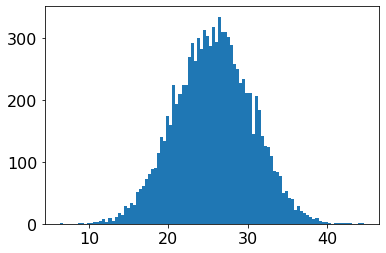

In [46]:
diff = [abs(RopeMean[x]-lyingMean[x]) for x in range(10000)]
plt.hist(diff,bins=100)
plt.show()

In [47]:
D = abs(m1-m2)

S1 = (s1**2)/10000
S2 = (s2**2)/10000

zval = (D-0)/np.sqrt(S1+S2)

In [48]:
from scipy import stats

In [49]:
pval = stats.norm.sf(zval)
if pval >0.5:
    print("The p_value is ", pval, " and H1 is rejected.")
else:
    print("The p_value is ", pval, " and H0 is rejected.")
    

The p_value is  0.0  and H0 is rejected.


As the p-value is 0, we reject the Null Hpotheisis (H0) - Activities with less Acceleration of hands and ankles have the same heart rate as that of other cumbersome activities and accept the alternate hypothesis (H1) - Activities with more Acceleration of hands and ankles have more heart rate than the activities with less Acceleration of hands. 

This confirms that if there is considerable movement of hands, shoulders, ankles while performing any activity the heart rate will increase and the sensors will track the real time data 


# Moddeling

Data Modelling is the process of analysing the data objects and their relationship to the other objects. It is used to analyse the data requirements that are required for the business processes. These models are created for the data to be stored in a database. The Data Model's main focus is to figure out what operations we have to perform. I will be exploring 2 models and check for the accuracy to interpret which model fits best for this data.

Some variables have to be dropped which would impact our modelling precision. The variables to be dropped are timestamp and subject_id as they are numeric numbers which would our modelling method would use in its calculations but since their values don't have any meaning, the modelling method used would have noise and predictions of accuracy would be inaccurate


In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedShuffleSplit
from sklearn.metrics import precision_score,recall_score, f1_score, confusion_matrix,roc_auc_score,roc_curve, accuracy_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [51]:
training_data = training_data.drop(["timestamp", "subject_id"],1)

Here I have applied scaling to all the columns except Subject_id and Activity ID. By applying scaling, the feature will standardize the independent features present in the data in a fixed range. This will improve the convergence speed of the model. After scaling the data is divided into training data and testing data so that we can test the model on testing data to check the accuracy. 

In [52]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,RobustScaler

#apply scaling to all columns except subject and activity 
scaler = RobustScaler()
df_scaled = training_data.copy()
df_scaled_test = training_data.copy()

df_scaled.iloc[:,1:41] = scaler.fit_transform(df_scaled.iloc[:,1:41])
df_scaled_test.iloc[:,1:41] = scaler.fit_transform(df_scaled_test.iloc[:,1:41])

df_scaled.head()

,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,...,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4
312921,3,-0.368421,0.447368,-0.384512,0.220069,-0.572507,-0.361436,0.256971,-0.530520,-0.012729,...,0.079272,-0.003718,-0.076595,-18.7246,-16.8796,36.806500,0.116820,-0.705470,0.242539,-0.655622
141735,12,1.681818,0.236842,-0.721708,-0.103407,-0.206281,-0.625117,-0.108947,-0.253147,-0.868631,...,-0.276670,0.669698,-0.143689,-51.7218,33.8385,-6.571620,1.000000,0.000000,0.000000,0.000000
1191085,24,2.026316,0.289474,0.457975,0.035504,-2.015047,0.603512,0.072534,-1.452154,-5.190897,...,1.877290,-0.176273,-0.654045,-44.6465,-12.2168,0.272571,0.494981,-0.086425,0.857743,0.108637
1206914,1,-1.105263,0.131579,1.290689,-0.693932,0.901352,1.320385,-0.723956,0.911347,0.065061,...,-0.008012,0.002114,0.017758,-17.3221,26.4451,-4.782110,0.179703,0.249454,0.760054,-0.572536
1710520,2,-0.657895,0.500000,0.434876,-2.413007,-0.473610,0.449008,-2.412753,-0.481267,-0.015890,...,0.010209,0.011341,0.028921,-19.4371,15.8269,26.000300,0.139010,0.675860,0.394159,0.607065


In [54]:
X_train = df_scaled.drop('activityID', axis=1).values
y_train = df_scaled['activityID'].values

# Test Dataset
X_test = df_scaled.drop('activityID', axis=1).values
y_test = df_scaled['activityID'].values

# PCA

Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set. The aim of this step is to standardize the range of the continuous initial variables so that each one of them contributes equally to the analysis. Organizing information in principal components will allow to reduce dimensionality without losing much information. 

Usually 90-98% of the variance will explain our data really well. So by plotting the variance ratio aginst the number of componments we could see how many of those we could use. As we see from the graph below 15 componments fall around to 94% of the variance.

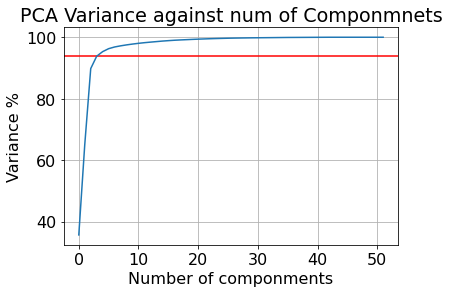

In [55]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
var= pca.explained_variance_ratio_
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

plt.title("PCA Variance against num of Componmnets")
plt.ylabel("Variance %")
plt.xlabel("Number of componments")
l = plt.axhline(94, color="red")

plt.plot(var1)
plt.grid()

In [56]:
pca = PCA(n_components=17)
X_train=pca.fit_transform(X_train)
X_test=pca.fit_transform(X_test)

After performing PCA on the data now I will be exploring 2 moddeling techniques. i.e. Logistic regresseion and Linear Regression. 

Logistic Regression - Logistic Regression is a Supervised learning algorithm that can be used to model the probability of a certain events. The result of it is a probability that a data point is part of a class. Here we will train our training model into classification to calculate the probability , recall and F1 score and then cross validate the results on testing data set.

Linear Regression - Linear Regression is the process of finding a line that best fits the data points available on the plot, so that we can use it to predict output values for inputs that are not present in the data set we have. In the below cells we have calculated the probability of the the output given certain inputs. 

In [57]:
def get_metrics (y_true,y_pred):
    acc = accuracy_score(y_true, y_pred)
    err = 1-acc
    p = precision_score(y_true, y_pred,average=None).mean()
    r = recall_score(y_true, y_pred, average=None).mean()
    f1 = f1_score(y_true, y_pred, average=None).mean()
   
    print("Accuracy: ",acc)
    print("Error: ",acc)
    print("Precision", p)
    print("Recall", r)
    print("F1", f1)
    #print("Accuracy: %.3f \nError: %.3f \nPrecesion: %.3f \nRecall: %.3f \nF1:%.3f \n"% (acc,err,p,r,f1) )
    

log_reg = LogisticRegression()
log_reg.fit(X=X_train, y=y_train )
y_pred_lr = log_reg.predict(X_test)
get_metrics(y_test, y_pred_lr)

C:\Users\SHALAKA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:  0.532908103851385
Error:  0.532908103851385
Precision 0.5114972235340648
Recall 0.4610123668834345
F1 0.46049011451310706


As we can see from the above output the accuracy of the training data set is about 0.53, Error rate is 0.53. The Recall and F1 scores are low than expected. 

In the below cell we will be exploring the linear regression algorithm. To start with, first we have to find the intercept and co-effients of the data and then put those values in the predictor which will give us the predicted output values. 

In [58]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
print("The intercept of the linear regresssion is ",regressor.intercept_ , "\n","The coefficient is ", regressor.coef_ )

The intercept of the linear regresssion is  8.080534106072323 
 The coefficient is  [ 0.02508087 -0.07886901 -0.04244615  0.04353273 -0.08855195 -0.23115422
 -0.07612786  0.11294267  0.05472226 -0.01262914 -0.1944536   0.21023502
 -0.10771596 -0.25953047  1.22101021 -0.46600656  0.17156241]


In [59]:
y_pred = regressor.predict(X_test)
y_pred

array([ 9.79193479,  8.93740182,  8.44356663, ..., 12.75949961,
       10.2057116 ,  9.66490019])

In [60]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,3,9.791935
1,12,8.937402
2,24,8.443567
3,1,1.453861
4,2,6.967232
...,...,...
1554293,3,6.001012
1554294,17,9.791207
1554295,17,12.759500
1554296,16,10.205712


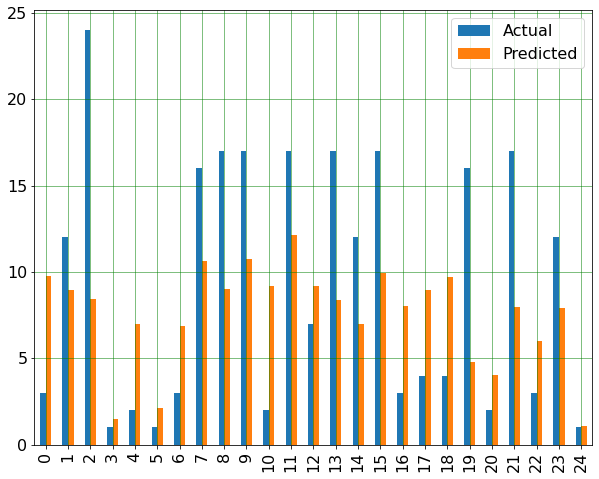

In [63]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [64]:
from sklearn import metrics
%matplotlib inline
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.531391118964234
Mean Squared Error: 29.471306678819712
Root Mean Squared Error: 5.428748168668327


As we can see from the above output of table and the graph , the precidted values are much higher than the actual vaules and here for our Model Linear Regression is not the best fit. 

# Cross Validation

Even though the above models seem to perform really good, the metrics used for that do not represent the real score since the models were train on a specific part of the dataset. By using cross validation, we could k=10 number of folds, which in few words, will generate 10 different samples. By doing that we will get 10 different metrics values. The mean value of these metrics will show a better representation of our model's performance

In [67]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

classifiers = [LogisticRegression()]

score_lst = []
for cls in classifiers:
    accs  = accuracy_score(y_train, cross_val_predict(cls,X_train,y_train,cv = 10))  #cross validate the accurancy 
    scores = cross_val_score(cls,X_train,y_train,scoring = "neg_mean_squared_error",cv= 10)#calcuate the error
    score = np.sqrt(-scores)
    f1 = cross_val_score(cls,X_test, y_test,scoring = "f1_macro", cv =10)
    
    
    #p = cross_val_score(cls,X_test, y_test,scoring = "average_precision", cv =10)
#     r = recall_score(y_true, y_pred, average=None).mean()
#     f1 = f1_score(y_true, y_pred, average=None).mean()
    score_lst.append([cls.__class__.__name__,accs,score.mean(), f1.mean()])

df_scores=pd.DataFrame(columns = ["Claasifier","Accurancy","MSE","F1"],data =  score_lst)
display(df_scores)

C:\Users\SHALAKA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SHALAKA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

,Claasifier,Accurancy,MSE,F1
0,LogisticRegression,0.532838,6.103757,0.46044


In [68]:
df_scores=pd.DataFrame(columns = ["Claasifier","Accurancy","MSE","F1"],data =  score_lst)
display(df_scores)

,Claasifier,Accurancy,MSE,F1
0,LogisticRegression,0.532838,6.103757,0.46044


From the cross verification logistic regression can be considered to be a better fit for the model than linear regression.  There is 53% of accuracy and we can improve the accuracy further by performing Hyperparameter Tuning - Grid Search. There is some amount of class imbalance n our data which can be explored more and then removed before performing the classification. 

# Summary

The data set contains information from 18 activities performed by 9 subjects, wearing 3 IMUs and a HR-monitor. The goal is to derive actionable insights which will help in developing hardware or software that can determine the amount and type of physical activity carried out by an individual. I have grouped the data with respect to the subject ID's, activity ID and timestamp. The idea is to check the amount of activities performed by each subject. The mean heart rate throughout the dataset is 107.4 and the minimum heart rate is 57. An IMU is a type of sensor that measures angular rate, force and sometimes magnetic field. 3 Colibri wireless IMUs are used, which have sampling frequency of 100Hz each. Heart rate monitors work by measuring electrical signals from the heart in real time. The main purpose of EDA is to detect any errors, outliers as well as to understand different patterns in the data. We are going to focus on heart rate as it is our most precise meter of check for tracking subjects during activities. The mean heart rate throughout the dataset is 107.4 beats per minute. Heart rate monitors work by measuring electrical signals from the heart in real time. In this experiment 1 Heart Rate Monitor is used by each subject which has a frequency of 9Hz. Over 10 hours of data were collected, from which nearly 8 hours were labelled as 1 of the 18 activities.

The main purpose of EDA is to detect any errors, outliers as well as to understand different patterns in the data. We are going to focus on heart rate as it is our most precise meter of check for tracking subjects during activities. Outliers have heart rate from 180 up to 202. Highest quartile group starts from 124 which is the end of the Inter-quartile range and finishes at 180. Our box plot shows that most subjects performed some activities at a statistically similar way but failed to do the same in all activities. The heatmap shows how much statistical similarity there is between our different columns. We can every easily observe that the gyroscopes do not correlate with any of our other data and seem unneeded in this model. On the other hand, we can understand the correlation between accelerometers of the hand and temperature.

I have taken random samples of data from both CumbersomeActivities and Convinient_data. After taking the samples I have stored them in RopeMean and lyingMean. The mean and standard deviation are evenly distributed from both sides before performing the z-test. As the p-value is 0, we reject the Null Hypothesis (H0) - Activities with less Acceleration of hands have the same heart rate as that of other cumbersome activities and accept the alternate hypothesis (H1) - Activities with more Acceleration of hands have more heart rate than the activities with less Acceleration of hands.

Logistic Regression is a Supervised learning algorithm that can be used to model the probability of certain events. There is 53% of accuracy and we can improve the accuracy further by performing Hyperparameter Tuning - Grid Search. The training data contains some amount of class imbalance, which can be explored more and then removed before performing the classification.



# Conclusion

From the above Analysis we have proved that the activities with more physical movements will lead to more acceleartion of hands, chest and ankle which in turn will increase the heart rate. The linear regression model used to check the accuracy did not fit perfectly on the data. Hence, I have used Logistic Regression model which gave accuracy of 53% which can further improved by  Hyperparameter Tuning - Grid Search. 